<a href="https://colab.research.google.com/github/MauricioRPF/Weather_Report/blob/main/Weather_Report_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bibliotecas b√°sicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para ler arquivo Excel
!pip install openpyxl
import openpyxl

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Estat√≠stica
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Configura√ß√µes de visualiza√ß√£o
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [2]:
# URL do arquivo Excel no GitHub (formato raw)
github_url = "https://github.com/MauricioRPF/Weather_Report/raw/refs/heads/main/Dados%20meteorol%C3%B3gicos%20di%C3%A1rios%20-%20esta%C3%A7%C3%A3o%20Embrapa%20Agrossilvipastoril.xlsx"

# Carregar o arquivo Excel
# skiprows=3 para pular as 3 primeiras linhas e come√ßar na linha 4 (cabe√ßalho)
confere = pd.read_excel(github_url, skiprows=3, engine='openpyxl')

print("Dimens√µes do DataFrame:", confere.shape)
print("\nPrimeiras 5 linhas:")
confere.head()

Dimens√µes do DataFrame: (4464, 20)

Primeiras 5 linhas:


Ano     M√™s   Dia                      ¬∞ C                Unnamed: 4  \
0     NaN     NaN   NaN  Temperatura m√©dia do ar  Temperatura m√°xima do ar   
1  2013.0  Agosto  13.0                     26.6                     36.06   
2  2013.0  Agosto  14.0                    23.67                     30.52   
3  2013.0  Agosto  15.0                    20.67                     29.86   
4  2013.0  Agosto  16.0                    23.44                     35.76   

                              hh:mm:ss                     ¬∞ C.1  \
0  Hor√°rio da temperatura m√°xima do ar  Temperatura m√≠nima do ar   
1                  2013-08-13 15:15:55                     17.44   
2                  2013-08-14 12:10:20                     17.42   
3                  2013-08-15 15:04:20                     13.12   
4                  2013-08-16 15:34:55                     12.22   

                            hh:mm:ss.1                             %  \
0  Hor√°rio da temperatura m√≠nima do ar  Umidade relativa m√©dia do ar   
1                  2013-08-13 06:03:05                         54.09   
2                  2013-08-14 23:59:15                         55.49   
3                  2013-08-15 06:00:25                         46.33   
4                  2013-08-16 05:29:50                         46.13   

                      Unnamed: 9                                hh:mm:ss.2  \
0  Umidade relativa m√°xima do ar  Hor√°rio da umidade relativa m√°xima do ar   
1                           87.4                       2013-08-13 05:50:55   
2                          79.63                       2013-08-14 00:33:10   
3                          68.05                       2013-08-15 05:29:35   
4                           85.3                       2013-08-16 05:29:05   

                             %.1                                hh:mm:ss.3  \
0  Umidade relativa m√≠nima do ar  Hor√°rio da umidade relativa m√≠nima do ar   
1                          25.69                       2013-08-13 15:26:05   
2                          36.04                       2013-08-14 14:51:55   
3                           26.1                       2013-08-15 12:27:55   
4                          20.25                       2013-08-16 15:35:05   

                        m s-1                             hh:mm:ss.4  \
0  Velocidade m√°xima do vento  Hor√°rio da velocidade m√°xima do vento   
1                       10.08                    2013-08-13 12:27:00   
2                        11.1                    2013-08-14 12:23:55   
3                        9.26                    2013-08-15 09:14:40   
4                        6.37                    2013-08-16 09:55:25   

                       mm             MJ m-2 d-1  \
0  Precipita√ß√£o acumulada  Radia√ß√£o solar global   
1                       0                  18.61   
2                       0                  20.81   
3                       0                  19.26   
4                       0                  22.12   

                          Unnamed: 17                    m s-1.1  \
0  Radia√ß√£o fotossinteticamente ativa  Velocidade m√©dia do vento   
1                               6.811                      1.407   
2                               7.517                      4.168   
3                                6.96                       2.57   
4                               7.971                      1.803   

                           Graus  
0  Dire√ß√£o predominante do vento  
1                          359.5  
2                          194.6  
3                          179.2  
4                          123.7

In [3]:
# URL do arquivo Excel no GitHub (formato raw)
github_url = "https://github.com/MauricioRPF/Weather_Report/raw/refs/heads/main/Dados%20meteorol%C3%B3gicos%20di%C3%A1rios%20-%20esta%C3%A7%C3%A3o%20Embrapa%20Agrossilvipastoril.xlsx"

# Carregar o arquivo Excel
# skiprows=3 para pular as 3 primeiras linhas e come√ßar na linha 4 (cabe√ßalho)
df = pd.read_excel(github_url, skiprows=4, engine='openpyxl')

novos_nomes = list(df.columns)
novos_nomes[0] = 'Ano'
novos_nomes[1] = 'M√™s'
novos_nomes[2] = 'Dia'
df.columns = novos_nomes

# Verificar se carregou corretamente
print("Dimens√µes do DataFrame:", df.shape)
print("\nPrimeiras 5 linhas:")
df.head()

Dimens√µes do DataFrame: (4463, 20)

Primeiras 5 linhas:


Ano     M√™s  Dia  Temperatura m√©dia do ar  Temperatura m√°xima do ar  \
0  2013  Agosto   13                    26.60                     36.06   
1  2013  Agosto   14                    23.67                     30.52   
2  2013  Agosto   15                    20.67                     29.86   
3  2013  Agosto   16                    23.44                     35.76   
4  2013  Agosto   17                    25.89                     36.33   

  Hor√°rio da temperatura m√°xima do ar  Temperatura m√≠nima do ar  \
0                 2013-08-13 15:15:55                     17.44   
1                 2013-08-14 12:10:20                     17.42   
2                 2013-08-15 15:04:20                     13.12   
3                 2013-08-16 15:34:55                     12.22   
4                 2013-08-17 12:51:35                     17.84   

  Hor√°rio da temperatura m√≠nima do ar  Umidade relativa m√©dia do ar  \
0                 2013-08-13 06:03:05                         54.09   
1                 2013-08-14 23:59:15                         55.49   
2                 2013-08-15 06:00:25                         46.33   
3                 2013-08-16 05:29:50                         46.13   
4                 2013-08-17 06:04:15                         47.76   

   Umidade relativa m√°xima do ar Hor√°rio da umidade relativa m√°xima do ar  \
0                          87.40                      2013-08-13 05:50:55   
1                          79.63                      2013-08-14 00:33:10   
2                          68.05                      2013-08-15 05:29:35   
3                          85.30                      2013-08-16 05:29:05   
4                          72.86                      2013-08-17 06:17:25   

   Umidade relativa m√≠nima do ar Hor√°rio da umidade relativa m√≠nima do ar  \
0                          25.69                      2013-08-13 15:26:05   
1                          36.04                      2013-08-14 14:51:55   
2                          26.10                      2013-08-15 12:27:55   
3                          20.25                      2013-08-16 15:35:05   
4                          21.23                      2013-08-17 12:51:50   

   Velocidade m√°xima do vento Hor√°rio da velocidade m√°xima do vento  \
0                       10.08                   2013-08-13 12:27:00   
1                       11.10                   2013-08-14 12:23:55   
2                        9.26                   2013-08-15 09:14:40   
3                        6.37                   2013-08-16 09:55:25   
4                        8.00                   2013-08-17 11:58:55   

   Precipita√ß√£o acumulada  Radia√ß√£o solar global  \
0                     0.0                  18.61   
1                     0.0                  20.81   
2                     0.0                  19.26   
3                     0.0                  22.12   
4                     0.0                  19.50   

   Radia√ß√£o fotossinteticamente ativa  Velocidade m√©dia do vento  \
0                               6.811                      1.407   
1                               7.517                      4.168   
2                               6.960                      2.570   
3                               7.971                      1.803   
4                               7.067                      2.024   

   Dire√ß√£o predominante do vento  
0                          359.5  
1                          194.6  
2                          179.2  
3                          123.7  
4                          126.9

In [4]:
# Informa√ß√µes b√°sicas do DataFrame
print("=== INFORMA√á√ïES DO DATAFRAME ===")
df.info()

print("\n=== ESTAT√çSTICAS DESCRITIVAS ===")
df.describe()

print("\n=== NOMES DAS COLUNAS ===")
print(df.columns.tolist())

print("\n=== VERIFICANDO VALORES NULOS ===")
print(df.isnull().sum())

=== INFORMA√á√ïES DO DATAFRAME ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Ano                                       4463 non-null   int64  
 1   M√™s                                       4463 non-null   object 
 2   Dia                                       4463 non-null   int64  
 3   Temperatura m√©dia do ar                   4451 non-null   float64
 4   Temperatura m√°xima do ar                  4451 non-null   float64
 5   Hor√°rio da temperatura m√°xima do ar       4451 non-null   object 
 6   Temperatura m√≠nima do ar                  4451 non-null   float64
 7   Hor√°rio da temperatura m√≠nima do ar       4451 non-null   object 
 8   Umidade relativa m√©dia do ar              4451 non-null   float64
 9   Umidade relativa m√°xima do ar             4451 non-null   floa

In [5]:
print("=== CONVERS√ÉO DO M√äS DE TEXTO PARA N√öMERO ===")

# Verificar os valores √∫nicos na coluna M√™s
print("Valores √∫nicos na coluna 'M√™s':")
print(df['M√™s'].unique())

# Dicion√°rio de mapeamento portugu√™s-ingl√™s para n√∫meros
mes_para_numero = {
    'Janeiro': 1, 'Fevereiro': 2, 'Mar√ßo': 3, 'Abril': 4,
    'Maio': 5, 'Junho': 6, 'Julho': 7, 'Agosto': 8,
    'Setembro': 9, 'Outubro': 10, 'Novembro': 11, 'Dezembro': 12
}

# Converter m√™s texto para n√∫mero
df['M√™s_num'] = df['M√™s'].map(mes_para_numero)

# Verificar a convers√£o
print("\nConvers√£o realizada:")
print(df[['M√™s', 'M√™s_num']].head(10))

# Verificar se alguma linha n√£o foi convertida (valores NaN)
na_count = df['M√™s_num'].isna().sum()
print(f"\nLinhas n√£o convertidas: {na_count}")
if na_count > 0:
    print("Meses n√£o mapeados:")
    print(df[df['M√™s_num'].isna()]['M√™s'].unique())

=== CONVERS√ÉO DO M√äS DE TEXTO PARA N√öMERO ===
Valores √∫nicos na coluna 'M√™s':
['Agosto' 'Setembro' 'Outubro' 'Novembro' 'Dezembro' 'Janeiro' 'Fevereiro'
 'Mar√ßo' 'Abril' 'Maio' 'Junho' 'Julho']

Convers√£o realizada:
      M√™s  M√™s_num
0  Agosto        8
1  Agosto        8
2  Agosto        8
3  Agosto        8
4  Agosto        8
5  Agosto        8
6  Agosto        8
7  Agosto        8
8  Agosto        8
9  Agosto        8

Linhas n√£o convertidas: 0


In [6]:
print("=== ABORDAGEM DIRETA - USANDO OS √çNDICES DAS COLUNAS ===")

# Assumindo que:
# Coluna 0 = Ano, Coluna 1 = M√™s (texto), Coluna 2 = Dia
print(f"Ano (coluna 0): {df.columns[0]}")
print(f"M√™s (coluna 1): {df.columns[1]}")
print(f"Dia (coluna 2): {df.columns[2]}")

# Criar data usando os √≠ndices das colunas
df['Data'] = pd.to_datetime({
    'year': df.iloc[:, 0],  # Ano (primeira coluna)
    'month': df['M√™s_num'], # M√™s num√©rico que criamos
    'day': df.iloc[:, 2]    # Dia (terceira coluna)
})

print(f"\nData criada com sucesso usando √≠ndices!")
print(df[['Data']].head())

=== ABORDAGEM DIRETA - USANDO OS √çNDICES DAS COLUNAS ===
Ano (coluna 0): Ano
M√™s (coluna 1): M√™s
Dia (coluna 2): Dia

Data criada com sucesso usando √≠ndices!
        Data
0 2013-08-13
1 2013-08-14
2 2013-08-15
3 2013-08-16
4 2013-08-17


In [7]:
print("=== REORGANIZANDO O DATAFRAME ===")

print("Shape antes da reorganiza√ß√£o:", df.shape)
print("Colunas antes:", df.columns.tolist())

# Salvar a coluna Data temporariamente
data_col = df['Data'].copy()

# Remover as 3 primeiras colunas (Ano, M√™s, Dia) e a coluna Data atual
# Vamos remover pelo √≠ndice das colunas
df_clean = df.drop(df.columns[[0, 1, 2]], axis=1)  # Remove as 3 primeiras colunas
df_clean = df_clean.drop('Data', axis=1)  # Remove a coluna Data atual (que est√° no final)

# Adicionar a coluna Data na primeira posi√ß√£o
df_clean.insert(0, 'Data', data_col)

print("\nShape ap√≥s reorganiza√ß√£o:", df_clean.shape)
print("Colunas ap√≥s:", df_clean.columns.tolist())

print("\nPrimeiras 5 linhas do DataFrame reorganizado:")
df_clean.head()

=== REORGANIZANDO O DATAFRAME ===
Shape antes da reorganiza√ß√£o: (4463, 22)
Colunas antes: ['Ano', 'M√™s', 'Dia', 'Temperatura m√©dia do ar', 'Temperatura m√°xima do ar', 'Hor√°rio da temperatura m√°xima do ar', 'Temperatura m√≠nima do ar', 'Hor√°rio da temperatura m√≠nima do ar', 'Umidade relativa m√©dia do ar', 'Umidade relativa m√°xima do ar', 'Hor√°rio da umidade relativa m√°xima do ar', 'Umidade relativa m√≠nima do ar', 'Hor√°rio da umidade relativa m√≠nima do ar', 'Velocidade m√°xima do vento', 'Hor√°rio da velocidade m√°xima do vento', 'Precipita√ß√£o acumulada', 'Radia√ß√£o solar global', 'Radia√ß√£o fotossinteticamente ativa', 'Velocidade m√©dia do vento', 'Dire√ß√£o predominante do vento', 'M√™s_num', 'Data']

Shape ap√≥s reorganiza√ß√£o: (4463, 19)
Colunas ap√≥s: ['Data', 'Temperatura m√©dia do ar', 'Temperatura m√°xima do ar', 'Hor√°rio da temperatura m√°xima do ar', 'Temperatura m√≠nima do ar', 'Hor√°rio da temperatura m√≠nima do ar', 'Umidade relativa m√©dia do ar', 'Umi

Data  Temperatura m√©dia do ar  Temperatura m√°xima do ar  \
0 2013-08-13                    26.60                     36.06   
1 2013-08-14                    23.67                     30.52   
2 2013-08-15                    20.67                     29.86   
3 2013-08-16                    23.44                     35.76   
4 2013-08-17                    25.89                     36.33   

  Hor√°rio da temperatura m√°xima do ar  Temperatura m√≠nima do ar  \
0                 2013-08-13 15:15:55                     17.44   
1                 2013-08-14 12:10:20                     17.42   
2                 2013-08-15 15:04:20                     13.12   
3                 2013-08-16 15:34:55                     12.22   
4                 2013-08-17 12:51:35                     17.84   

  Hor√°rio da temperatura m√≠nima do ar  Umidade relativa m√©dia do ar  \
0                 2013-08-13 06:03:05                         54.09   
1                 2013-08-14 23:59:15                         55.49   
2                 2013-08-15 06:00:25                         46.33   
3                 2013-08-16 05:29:50                         46.13   
4                 2013-08-17 06:04:15                         47.76   

   Umidade relativa m√°xima do ar Hor√°rio da umidade relativa m√°xima do ar  \
0                          87.40                      2013-08-13 05:50:55   
1                          79.63                      2013-08-14 00:33:10   
2                          68.05                      2013-08-15 05:29:35   
3                          85.30                      2013-08-16 05:29:05   
4                          72.86                      2013-08-17 06:17:25   

   Umidade relativa m√≠nima do ar Hor√°rio da umidade relativa m√≠nima do ar  \
0                          25.69                      2013-08-13 15:26:05   
1                          36.04                      2013-08-14 14:51:55   
2                          26.10                      2013-08-15 12:27:55   
3                          20.25                      2013-08-16 15:35:05   
4                          21.23                      2013-08-17 12:51:50   

   Velocidade m√°xima do vento Hor√°rio da velocidade m√°xima do vento  \
0                       10.08                   2013-08-13 12:27:00   
1                       11.10                   2013-08-14 12:23:55   
2                        9.26                   2013-08-15 09:14:40   
3                        6.37                   2013-08-16 09:55:25   
4                        8.00                   2013-08-17 11:58:55   

   Precipita√ß√£o acumulada  Radia√ß√£o solar global  \
0                     0.0                  18.61   
1                     0.0                  20.81   
2                     0.0                  19.26   
3                     0.0                  22.12   
4                     0.0                  19.50   

   Radia√ß√£o fotossinteticamente ativa  Velocidade m√©dia do vento  \
0                               6.811                      1.407   
1                               7.517                      4.168   
2                               6.960                      2.570   
3                               7.971                      1.803   
4                               7.067                      2.024   

   Dire√ß√£o predominante do vento  M√™s_num  
0                          359.5        8  
1                          194.6        8  
2                          179.2        8  
3                          123.7        8  
4                          126.9        8

In [8]:
print("=== VERIFICA√á√ÉO FINAL ===")
print(f"Shape: {df_clean.shape}")
print(f"\nPrimeira coluna: '{df_clean.columns[0]}'")
print(f"Tipo da coluna Data: {df_clean['Data'].dtype}")
print(f"\nPer√≠odo coberto: {df_clean['Data'].min()} at√© {df_clean['Data'].max()}")
print(f"Total de registros: {len(df_clean)}")

print("\nEstrutura completa:")
df_clean.info()

=== VERIFICA√á√ÉO FINAL ===
Shape: (4463, 19)

Primeira coluna: 'Data'
Tipo da coluna Data: datetime64[ns]

Per√≠odo coberto: 2013-08-13 00:00:00 at√© 2025-10-31 00:00:00
Total de registros: 4463

Estrutura completa:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data                                      4463 non-null   datetime64[ns]
 1   Temperatura m√©dia do ar                   4451 non-null   float64       
 2   Temperatura m√°xima do ar                  4451 non-null   float64       
 3   Hor√°rio da temperatura m√°xima do ar       4451 non-null   object        
 4   Temperatura m√≠nima do ar                  4451 non-null   float64       
 5   Hor√°rio da temperatura m√≠nima do ar       4451 non-null   object        
 6   Umidade relativa m√©dia do ar           

In [9]:
# Atualizar o DataFrame principal
df = df_clean.copy()

print("DataFrame final preparado!")
print(f"Colunas: {df.columns.tolist()}")
print(f"Primeira coluna: {df.columns[0]}")

DataFrame final preparado!
Colunas: ['Data', 'Temperatura m√©dia do ar', 'Temperatura m√°xima do ar', 'Hor√°rio da temperatura m√°xima do ar', 'Temperatura m√≠nima do ar', 'Hor√°rio da temperatura m√≠nima do ar', 'Umidade relativa m√©dia do ar', 'Umidade relativa m√°xima do ar', 'Hor√°rio da umidade relativa m√°xima do ar', 'Umidade relativa m√≠nima do ar', 'Hor√°rio da umidade relativa m√≠nima do ar', 'Velocidade m√°xima do vento', 'Hor√°rio da velocidade m√°xima do vento', 'Precipita√ß√£o acumulada', 'Radia√ß√£o solar global', 'Radia√ß√£o fotossinteticamente ativa', 'Velocidade m√©dia do vento', 'Dire√ß√£o predominante do vento', 'M√™s_num']
Primeira coluna: Data


In [10]:
print("=== AN√ÅLISE DE VALORES MISSING ===")
missing_analysis = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_analysis,
    'Missing_Percent': missing_percent
})
print(missing_df[missing_df['Missing_Count'] > 0])

=== AN√ÅLISE DE VALORES MISSING ===
                                          Missing_Count  Missing_Percent
Temperatura m√©dia do ar                              12         0.268877
Temperatura m√°xima do ar                             12         0.268877
Hor√°rio da temperatura m√°xima do ar                  12         0.268877
Temperatura m√≠nima do ar                             12         0.268877
Hor√°rio da temperatura m√≠nima do ar                  12         0.268877
Umidade relativa m√©dia do ar                         12         0.268877
Umidade relativa m√°xima do ar                        12         0.268877
Hor√°rio da umidade relativa m√°xima do ar             12         0.268877
Umidade relativa m√≠nima do ar                        12         0.268877
Hor√°rio da umidade relativa m√≠nima do ar             12         0.268877
Velocidade m√°xima do vento                           12         0.268877
Hor√°rio da velocidade m√°xima do vento                12         0.26887

In [11]:
print("=== DISTRIBUI√á√ÉO DAS VARI√ÅVEIS NUM√âRICAS ===")

# Selecionar apenas colunas num√©ricas (excluir Ano, M√™s, Dia inicialmente)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Vari√°veis num√©ricas:", numeric_cols)

# Estat√≠sticas descritivas detalhadas
print("\nEstat√≠sticas descritivas:")
df[numeric_cols].describe()

=== DISTRIBUI√á√ÉO DAS VARI√ÅVEIS NUM√âRICAS ===
Vari√°veis num√©ricas: ['Temperatura m√©dia do ar', 'Temperatura m√°xima do ar', 'Temperatura m√≠nima do ar', 'Umidade relativa m√©dia do ar', 'Umidade relativa m√°xima do ar', 'Umidade relativa m√≠nima do ar', 'Velocidade m√°xima do vento', 'Precipita√ß√£o acumulada', 'Radia√ß√£o solar global', 'Radia√ß√£o fotossinteticamente ativa', 'Velocidade m√©dia do vento', 'Dire√ß√£o predominante do vento', 'M√™s_num']

Estat√≠sticas descritivas:


Temperatura m√©dia do ar  Temperatura m√°xima do ar  \
count              4451.000000               4451.000000   
mean                 25.703103                 33.146461   
std                   1.676831                  2.843641   
min                  15.550000                 22.900000   
25%                  24.720000                 31.580000   
50%                  25.620000                 33.110000   
75%                  26.670000                 34.815000   
max                  31.260000                 40.870000   

       Temperatura m√≠nima do ar  Umidade relativa m√©dia do ar  \
count               4451.000000                   4451.000000   
mean                  20.033855                     73.506188   
std                    2.588636                     15.655526   
min                    8.290000                     28.150000   
25%                   18.600000                     61.860000   
50%                   20.970000                     77.890000   
75%                   21.900000                     85.900000   
max                   24.670000                    100.000000   

       Umidade relativa m√°xima do ar  Umidade relativa m√≠nima do ar  \
count                    4451.000000                    4451.000000   
mean                       93.501069                      44.600239   
std                         7.736382                      16.481426   
min                        51.080000                      10.000000   
25%                        91.200000                      30.910000   
50%                        95.900000                      45.620000   
75%                        99.750000                      56.470000   
max                       100.000000                      98.600000   

       Velocidade m√°xima do vento  Precipita√ß√£o acumulada  \
count                 4451.000000             4451.000000   
mean                     8.011461                6.200165   
std                      2.149048               15.568565   
min                      2.340000                0.000000   
25%                      6.550000                0.000000   
50%                      7.800000                0.000000   
75%                      9.000000                3.810000   
max                     20.870000              174.200000   

       Radia√ß√£o solar global  Radia√ß√£o fotossinteticamente ativa  \
count            4451.000000                         4451.000000   
mean               19.050585                            6.901168   
std                 4.091317                            1.554534   
min                 2.099000                            0.858000   
25%                17.205000                            6.142500   
50%                19.790000                            7.057000   
75%                21.685000                            7.896500   
max                28.820000                           11.980000   

       Velocidade m√©dia do vento  Dire√ß√£o predominante do vento      M√™s_num  
count                4451.000000                    4451.000000  4463.000000  
mean                    1.612503                     131.021410     6.570020  
std                     0.423144                     126.688773     3.437339  
min                     0.300000                       0.000000     1.000000  
25%                     1.332000                      45.675000     4.000000  
50%                     1.562000                      90.900000     7.000000  
75%                     1.834000                     192.400000    10.000000  
max                     4.349000                    4071.000000    12.000000

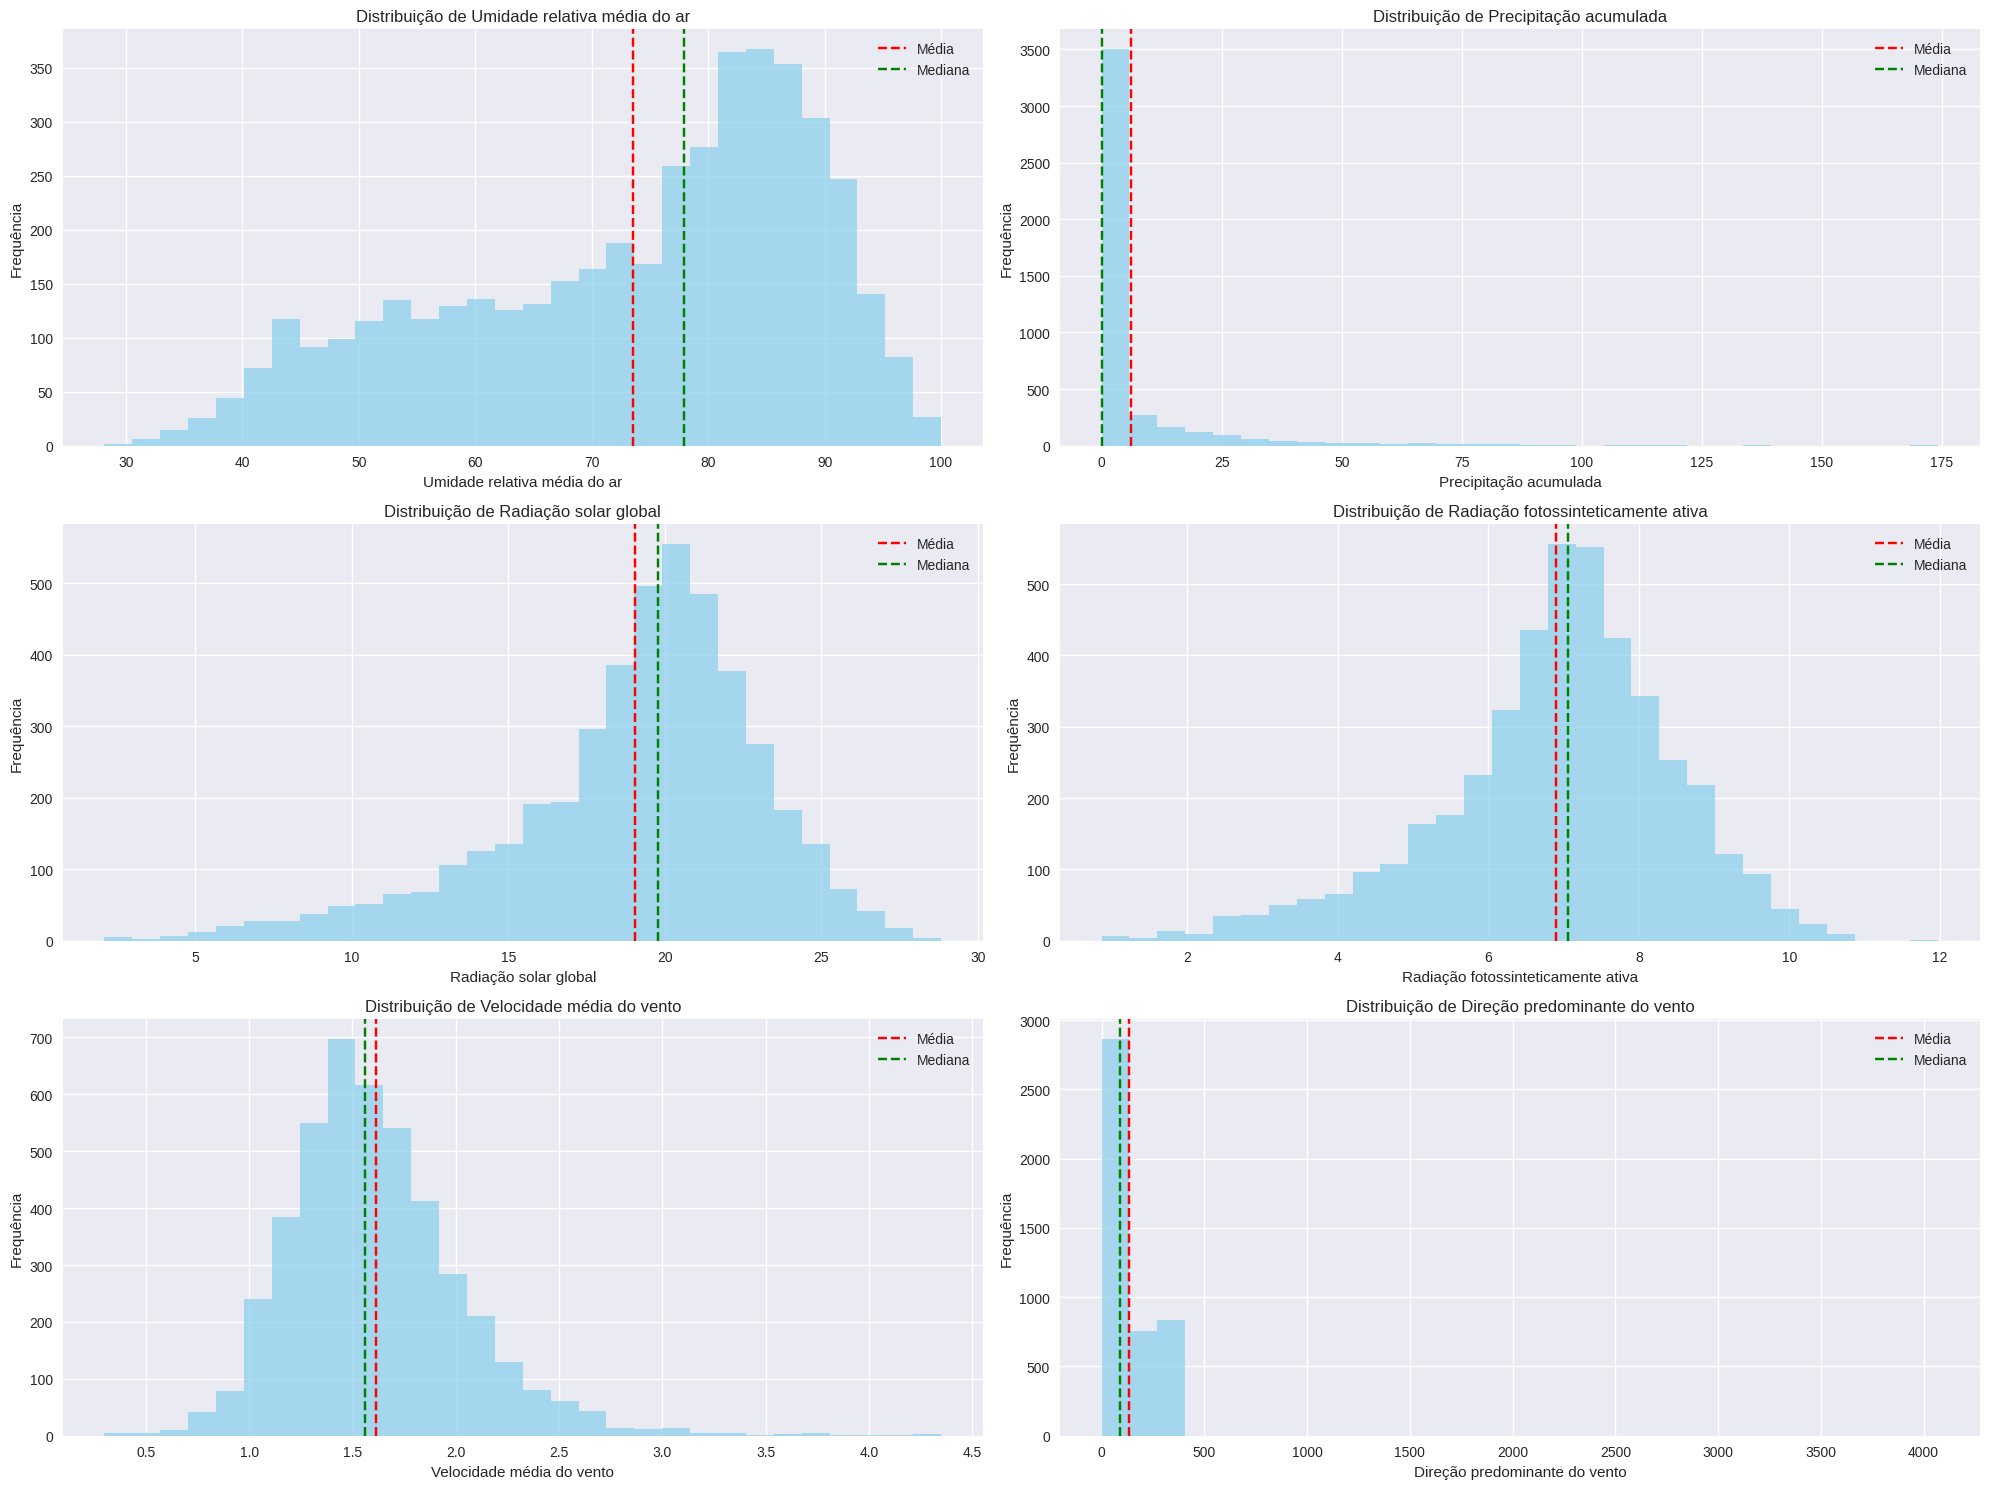

In [12]:
# Histogramas para vari√°veis principais (incluindo as novas)
plt.figure(figsize=(20, 15))
variaveis_principais = [
    'Umidade relativa m√©dia do ar',
    'Precipita√ß√£o acumulada',
    'Radia√ß√£o solar global',
    'Radia√ß√£o fotossinteticamente ativa',
    'Velocidade m√©dia do vento',
    'Dire√ß√£o predominante do vento'
]

for i, col in enumerate(variaveis_principais, 1):
    plt.subplot(3, 2, i)
    df[col].hist(bins=30, alpha=0.7, color='skyblue')
    plt.title(f'Distribui√ß√£o de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequ√™ncia')
    # Adicionar linhas verticais para m√©dia e mediana
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='M√©dia')
    plt.axvline(df[col].median(), color='green', linestyle='--', label='Mediana')
    plt.legend()

plt.tight_layout()
plt.show()

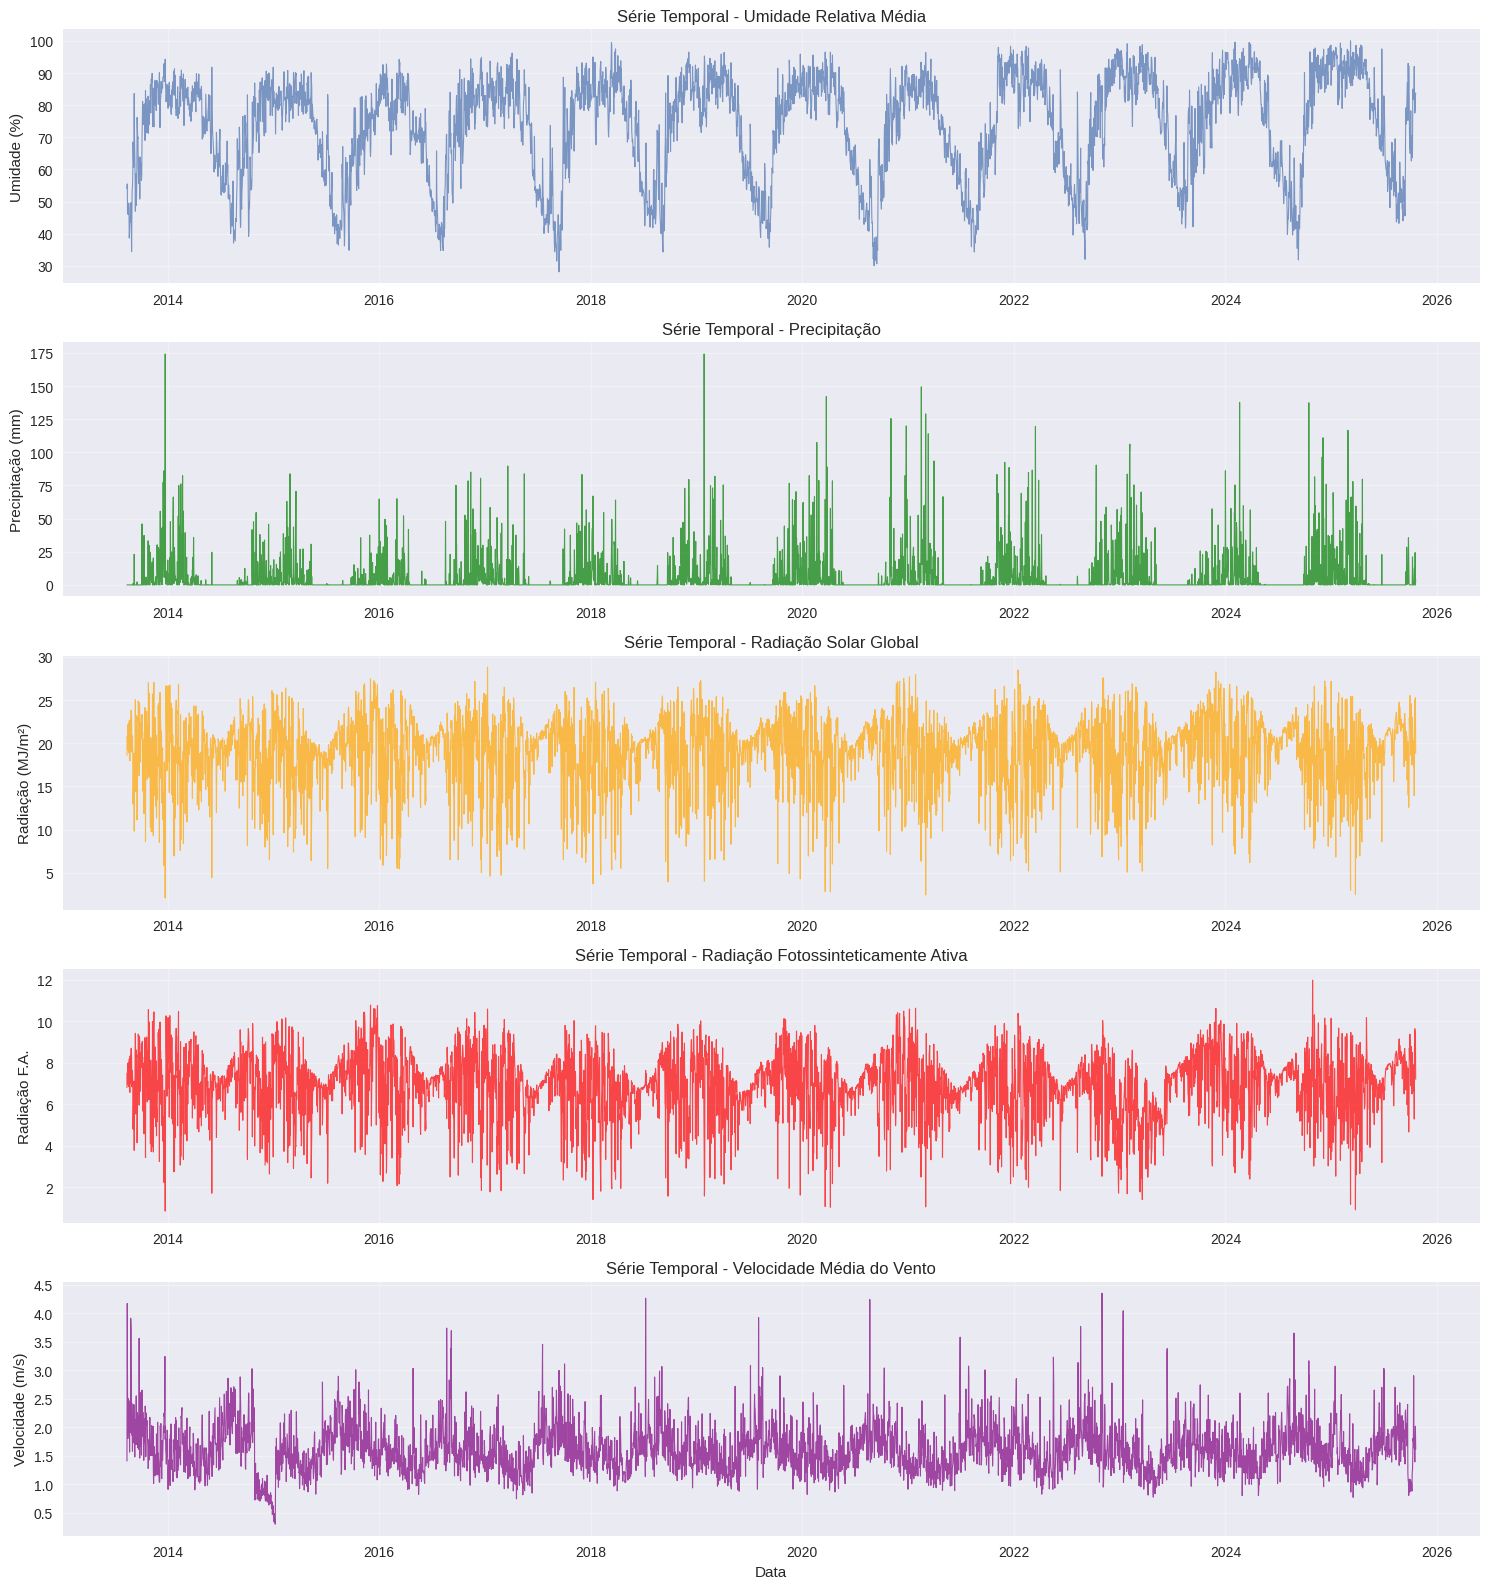

In [13]:
# Plotar s√©rie temporal das vari√°veis principais usando a coluna Data
plt.figure(figsize=(15, 16))

# Umidade Relativa
plt.subplot(5, 1, 1)
plt.plot(df['Data'], df['Umidade relativa m√©dia do ar'], alpha=0.7, linewidth=0.8)
plt.title('S√©rie Temporal - Umidade Relativa M√©dia')
plt.ylabel('Umidade (%)')
plt.grid(alpha=0.3)

# Precipita√ß√£o
plt.subplot(5, 1, 2)
plt.plot(df['Data'], df['Precipita√ß√£o acumulada'], alpha=0.7, color='green', linewidth=0.8)
plt.title('S√©rie Temporal - Precipita√ß√£o')
plt.ylabel('Precipita√ß√£o (mm)')
plt.grid(alpha=0.3)

# Radia√ß√£o Solar
plt.subplot(5, 1, 3)
plt.plot(df['Data'], df['Radia√ß√£o solar global'], alpha=0.7, color='orange', linewidth=0.8)
plt.title('S√©rie Temporal - Radia√ß√£o Solar Global')
plt.ylabel('Radia√ß√£o (MJ/m¬≤)')
plt.grid(alpha=0.3)

# Radia√ß√£o Fotossinteticamente Ativa
plt.subplot(5, 1, 4)
plt.plot(df['Data'], df['Radia√ß√£o fotossinteticamente ativa'], alpha=0.7, color='red', linewidth=0.8)
plt.title('S√©rie Temporal - Radia√ß√£o Fotossinteticamente Ativa')
plt.ylabel('Radia√ß√£o F.A.')
plt.grid(alpha=0.3)

# Velocidade do Vento
plt.subplot(5, 1, 5)
plt.plot(df['Data'], df['Velocidade m√©dia do vento'], alpha=0.7, color='purple', linewidth=0.8)
plt.title('S√©rie Temporal - Velocidade M√©dia do Vento')
plt.ylabel('Velocidade (m/s)')
plt.xlabel('Data')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

=== AN√ÅLISE DA DIRE√á√ÉO DO VENTO - ROSE PLOT ANUAL ===
Anos dispon√≠veis: [np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]
Total de anos: 13
Valores √∫nicos de dire√ß√£o do vento: [359.5  194.6  179.2  123.7  126.9  118.9   80.7   81.6   76.28  56.57]
Layout: 4 linhas x 4 colunas


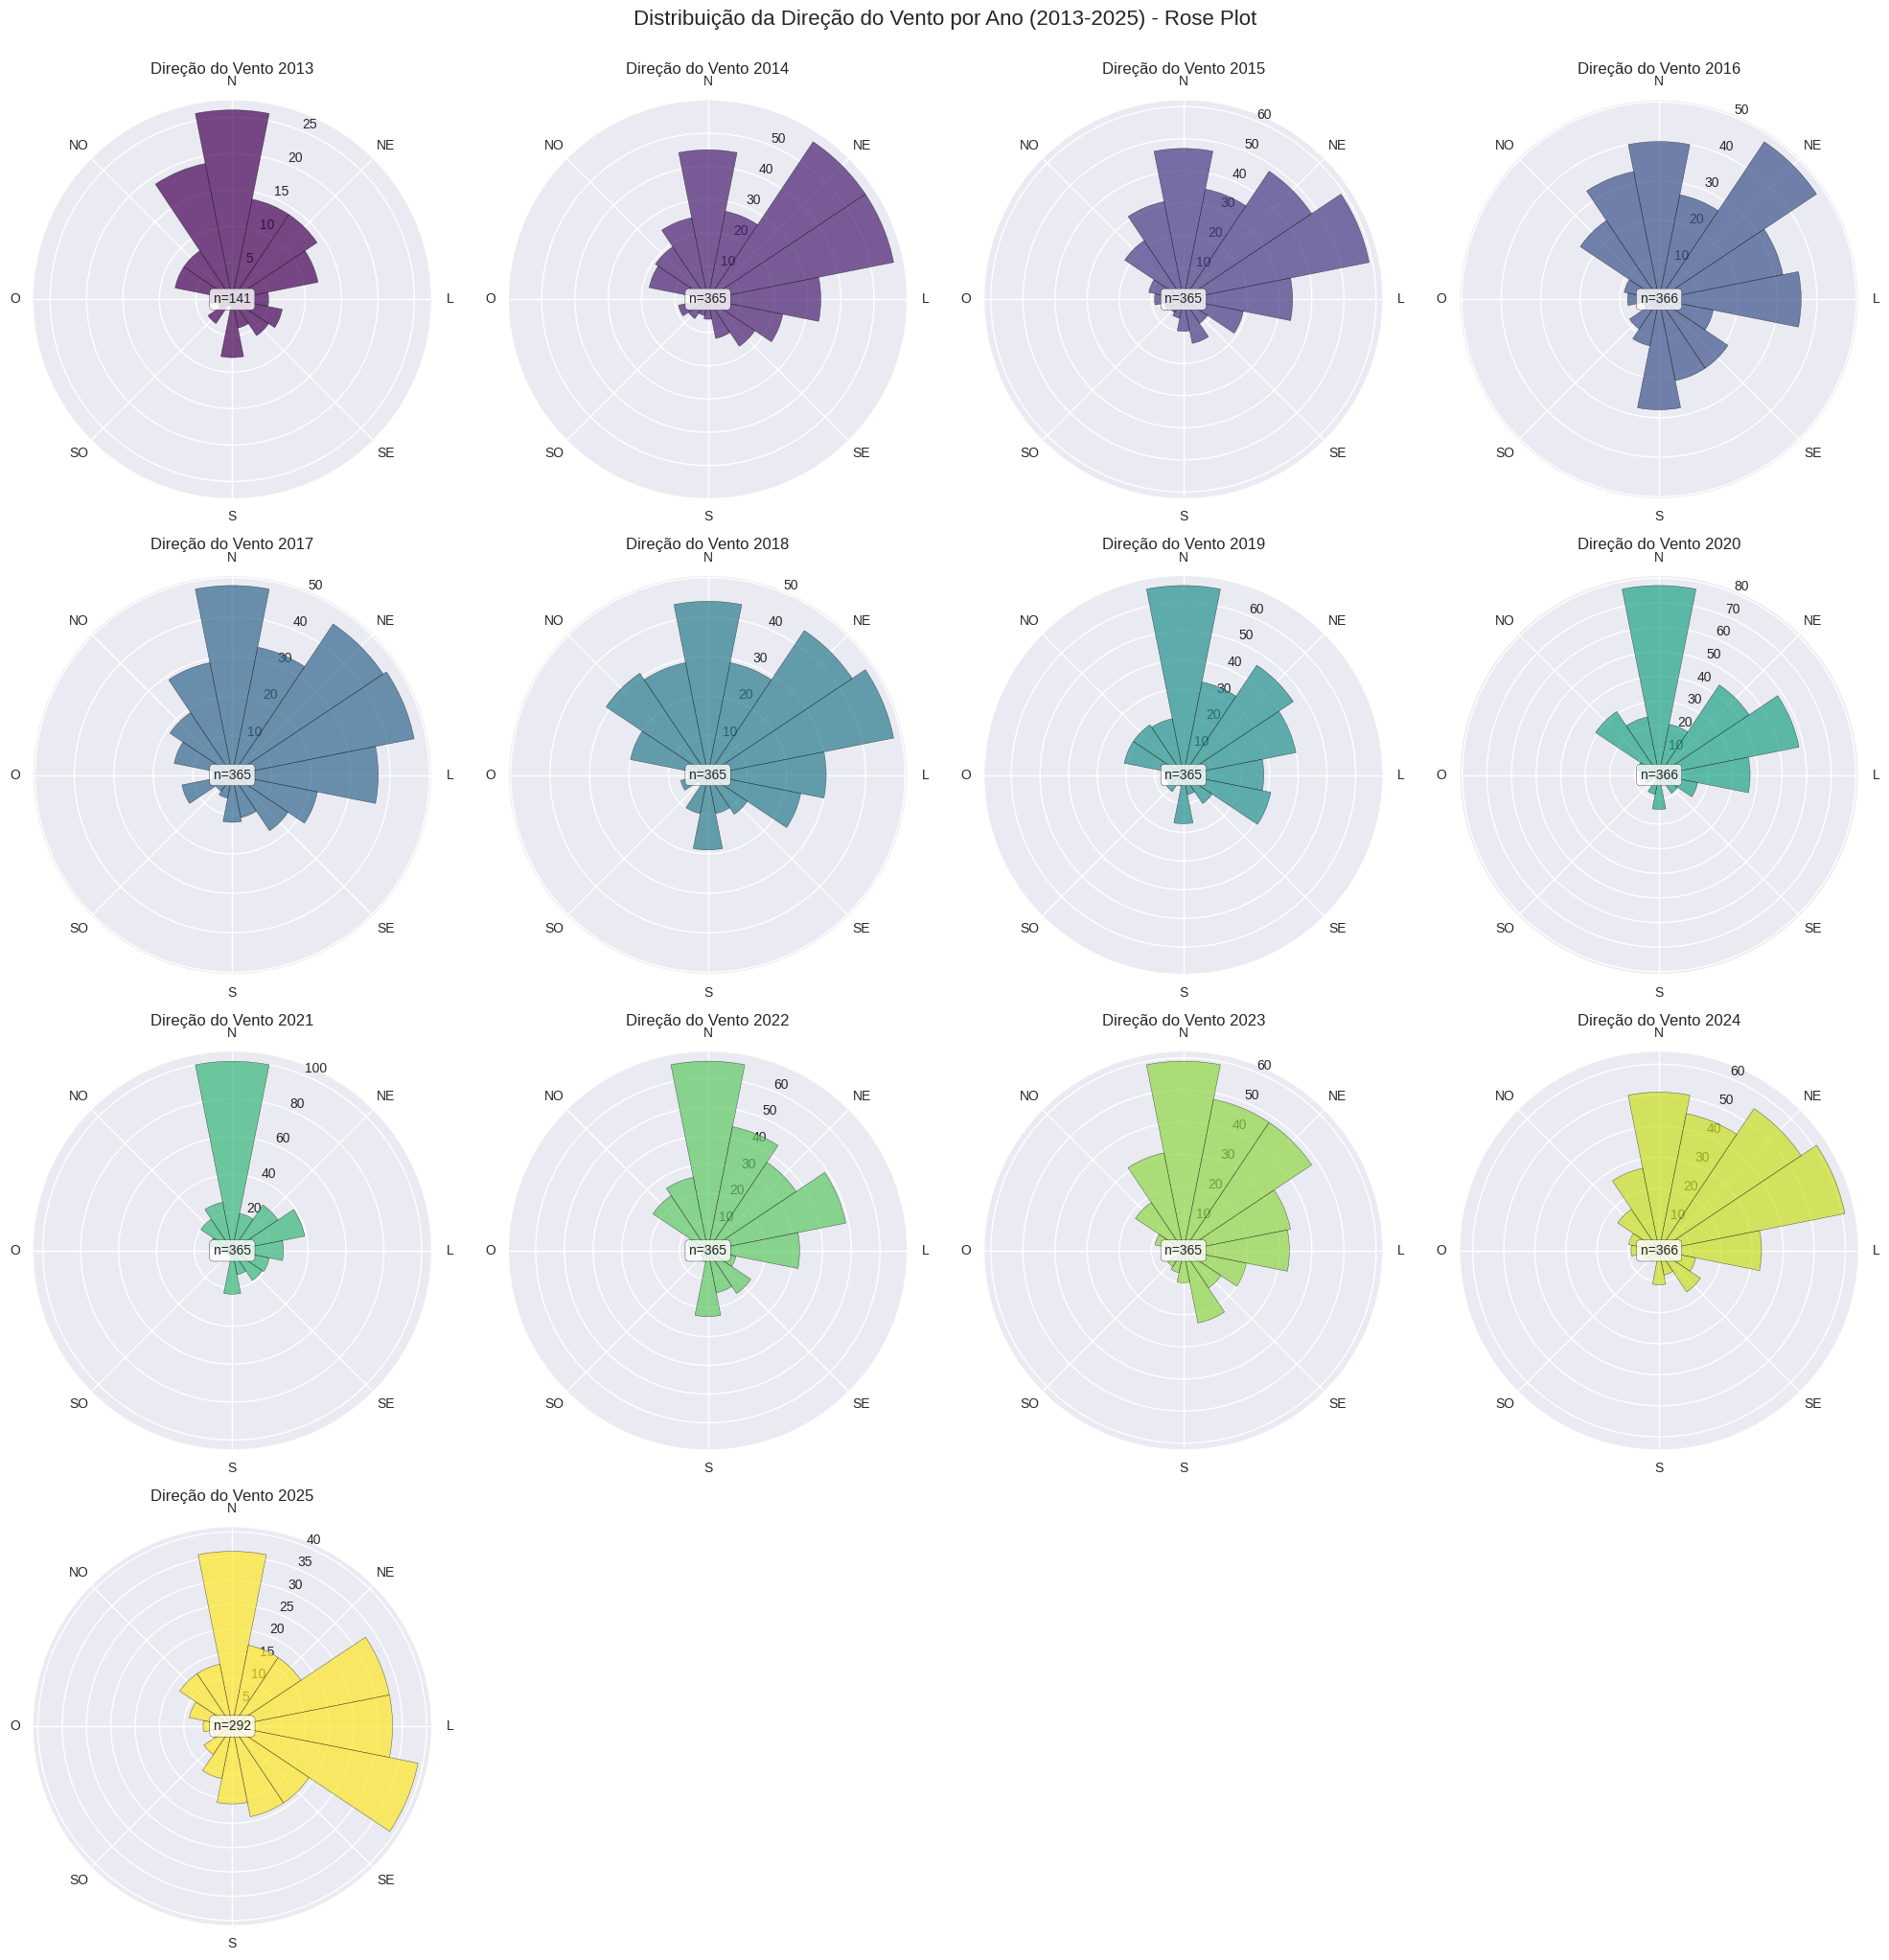


=== ESTAT√çSTICAS DA DIRE√á√ÉO DO VENTO ===
Per√≠odo: 2013 - 2025
Valores √∫nicos: 2984
Valor m√≠nimo: 0.0¬∞
Valor m√°ximo: 4071.0¬∞
M√©dia: 131.0¬∞
Mediana: 90.9¬∞

=== DIRE√á√ÉO PREDOMINANTE POR ANO ===
2013: Moda = 0.0¬∞, M√©dia = 148.6¬∞, n = 141
2014: Moda = 0.0¬∞, M√©dia = 129.1¬∞, n = 365
2015: Moda = 0.0¬∞, M√©dia = 132.0¬∞, n = 365
2016: Moda = 0.0¬∞, M√©dia = 146.6¬∞, n = 366
2017: Moda = 0.0¬∞, M√©dia = 134.0¬∞, n = 365
2018: Moda = 0.0¬∞, M√©dia = 144.7¬∞, n = 365
2019: Moda = 0.0¬∞, M√©dia = 126.7¬∞, n = 365
2020: Moda = 0.0¬∞, M√©dia = 123.2¬∞, n = 366
2021: Moda = 0.0¬∞, M√©dia = 120.4¬∞, n = 365
2022: Moda = 0.0¬∞, M√©dia = 121.1¬∞, n = 365
2023: Moda = 0.0¬∞, M√©dia = 123.0¬∞, n = 365
2024: Moda = 0.0¬∞, M√©dia = 129.3¬∞, n = 366
2025: Moda = 0.0¬∞, M√©dia = 136.3¬∞, n = 292


In [14]:
print("=== AN√ÅLISE DA DIRE√á√ÉO DO VENTO - ROSE PLOT ANUAL ===")

# Verificar se temos dados de dire√ß√£o do vento
if 'Dire√ß√£o predominante do vento' in df.columns:

    # Extrair ano da coluna Data
    df['Ano'] = df['Data'].dt.year
    anos = sorted(df['Ano'].unique())

    print(f"Anos dispon√≠veis: {anos}")
    print(f"Total de anos: {len(anos)}")
    print(f"Valores √∫nicos de dire√ß√£o do vento: {df['Dire√ß√£o predominante do vento'].unique()[:10]}")

    # Calcular layout din√¢mico baseado no n√∫mero de anos
    n_anos = len(anos)
    n_cols = 4  # M√°ximo de 4 colunas
    n_rows = (n_anos + n_cols - 1) // n_cols  # Arredondar para cima

    print(f"Layout: {n_rows} linhas x {n_cols} colunas")

    # Configurar o gr√°fico de rosa com layout din√¢mico
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows),
                           subplot_kw=dict(projection='polar'))

    # Se tiver apenas uma linha, transformar em array 2D
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)

    axes = axes.flatten()

    # Cor para cada ano
    cores = plt.cm.viridis(np.linspace(0, 1, len(anos)))

    for i, ano in enumerate(anos):
        if i >= len(axes):  # Safety check
            break

        # Filtrar dados do ano
        dados_ano = df[df['Ano'] == ano]['Dire√ß√£o predominante do vento'].dropna()

        if len(dados_ano) > 0:
            # Converter para radianos para o plot polar
            # Assumindo que a dire√ß√£o est√° em graus (0-360)
            theta = np.radians(dados_ano)

            # Criar histograma de dire√ß√µes (16 setores)
            n_bins = 16
            hist, bins = np.histogram(theta, bins=n_bins, range=(0, 2*np.pi))

            # Plotar no gr√°fico polar
            width = 2 * np.pi / n_bins
            bars = axes[i].bar(bins[:-1], hist, width=width, alpha=0.7,
                             color=cores[i], edgecolor='black')

            # Configurar o gr√°fico
            axes[i].set_title(f'Dire√ß√£o do Vento {ano}', fontsize=12, pad=20)
            axes[i].set_theta_zero_location('N')  # Norte no topo
            axes[i].set_theta_direction(-1)  # Sentido hor√°rio
            axes[i].set_xticks(np.pi/180. * np.arange(0, 360, 45))
            axes[i].set_xticklabels(['N', 'NE', 'L', 'SE', 'S', 'SO', 'O', 'NO'])

            # Adicionar contagem total
            axes[i].text(0.5, 0.5, f'n={len(dados_ano)}', transform=axes[i].transAxes,
                       ha='center', va='center', fontsize=10,
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
        else:
            axes[i].set_title(f'{ano} - Sem dados', fontsize=12)
            axes[i].text(0.5, 0.5, 'Sem dados', transform=axes[i].transAxes,
                       ha='center', va='center', fontsize=10)

    # Remover eixos vazios se necess√°rio
    for j in range(len(anos), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle(f'Distribui√ß√£o da Dire√ß√£o do Vento por Ano ({anos[0]}-{anos[-1]}) - Rose Plot',
                fontsize=16, y=1.02)
    plt.show()

    # Estat√≠sticas descritivas da dire√ß√£o do vento
    print("\n=== ESTAT√çSTICAS DA DIRE√á√ÉO DO VENTO ===")
    print(f"Per√≠odo: {anos[0]} - {anos[-1]}")
    print(f"Valores √∫nicos: {df['Dire√ß√£o predominante do vento'].nunique()}")
    print(f"Valor m√≠nimo: {df['Dire√ß√£o predominante do vento'].min()}¬∞")
    print(f"Valor m√°ximo: {df['Dire√ß√£o predominante do vento'].max()}¬∞")
    print(f"M√©dia: {df['Dire√ß√£o predominante do vento'].mean():.1f}¬∞")
    print(f"Mediana: {df['Dire√ß√£o predominante do vento'].median():.1f}¬∞")

    # Dire√ß√£o predominante por ano
    print("\n=== DIRE√á√ÉO PREDOMINANTE POR ANO ===")
    for ano in anos:
        dados_ano = df[df['Ano'] == ano]['Dire√ß√£o predominante do vento'].dropna()
        if len(dados_ano) > 0:
            moda = dados_ano.mode()
            media = dados_ano.mean()
            if len(moda) > 0:
                print(f"{ano}: Moda = {moda.iloc[0]}¬∞, M√©dia = {media:.1f}¬∞, n = {len(dados_ano)}")
        else:
            print(f"{ano}: Sem dados dispon√≠veis")

else:
    print("Coluna 'Dire√ß√£o predominante do vento' n√£o encontrada no DataFrame")

In [15]:
print("=== IDENTIFICA√á√ÉO DE OUTLIERS (M√©todo IQR) ===")

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Verificar outliers nas vari√°veis principais (incluindo as novas)
variaveis_analise = [
    'Umidade relativa m√©dia do ar',
    'Precipita√ß√£o acumulada',
    'Radia√ß√£o solar global',
    'Radia√ß√£o fotossinteticamente ativa',
    'Velocidade m√©dia do vento',
    'Dire√ß√£o predominante do vento'
]

# Adicionar temperatura se existir
if 'Temperatura m√©dia do ar' in df.columns:
    variaveis_analise.append('Temperatura m√©dia do ar')

print("An√°lise de Outliers:")
for col in variaveis_analise:
    outliers = detect_outliers_iqr(df[col])
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

=== IDENTIFICA√á√ÉO DE OUTLIERS (M√©todo IQR) ===
An√°lise de Outliers:
Umidade relativa m√©dia do ar: 0 outliers (0.00%)
Precipita√ß√£o acumulada: 747 outliers (16.74%)
Radia√ß√£o solar global: 208 outliers (4.66%)
Radia√ß√£o fotossinteticamente ativa: 172 outliers (3.85%)
Velocidade m√©dia do vento: 114 outliers (2.55%)
Dire√ß√£o predominante do vento: 1 outliers (0.02%)
Temperatura m√©dia do ar: 122 outliers (2.73%)


=== MATRIZ DE CORRELA√á√ÉO ===


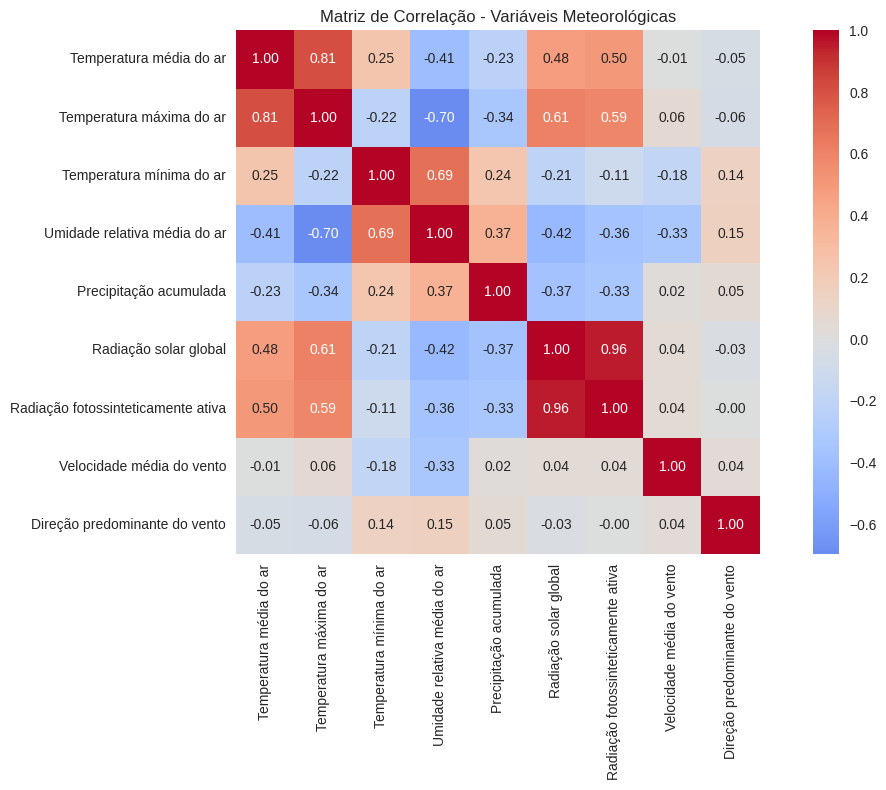

In [16]:
print("=== MATRIZ DE CORRELA√á√ÉO ===")

# Vari√°veis para an√°lise de correla√ß√£o
variaveis_correlacao = [
    'Temperatura m√©dia do ar', 'Temperatura m√°xima do ar', 'Temperatura m√≠nima do ar',
    'Umidade relativa m√©dia do ar', 'Precipita√ß√£o acumulada',
    'Radia√ß√£o solar global', 'Radia√ß√£o fotossinteticamente ativa',
    'Velocidade m√©dia do vento', 'Dire√ß√£o predominante do vento'
]

# Calcular matriz de correla√ß√£o
correlation_matrix = df[variaveis_correlacao].corr()

# Visualizar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Matriz de Correla√ß√£o - Vari√°veis Meteorol√≥gicas')
plt.tight_layout()
plt.show()

=== AN√ÅLISE DE SAZONALIDADE ===


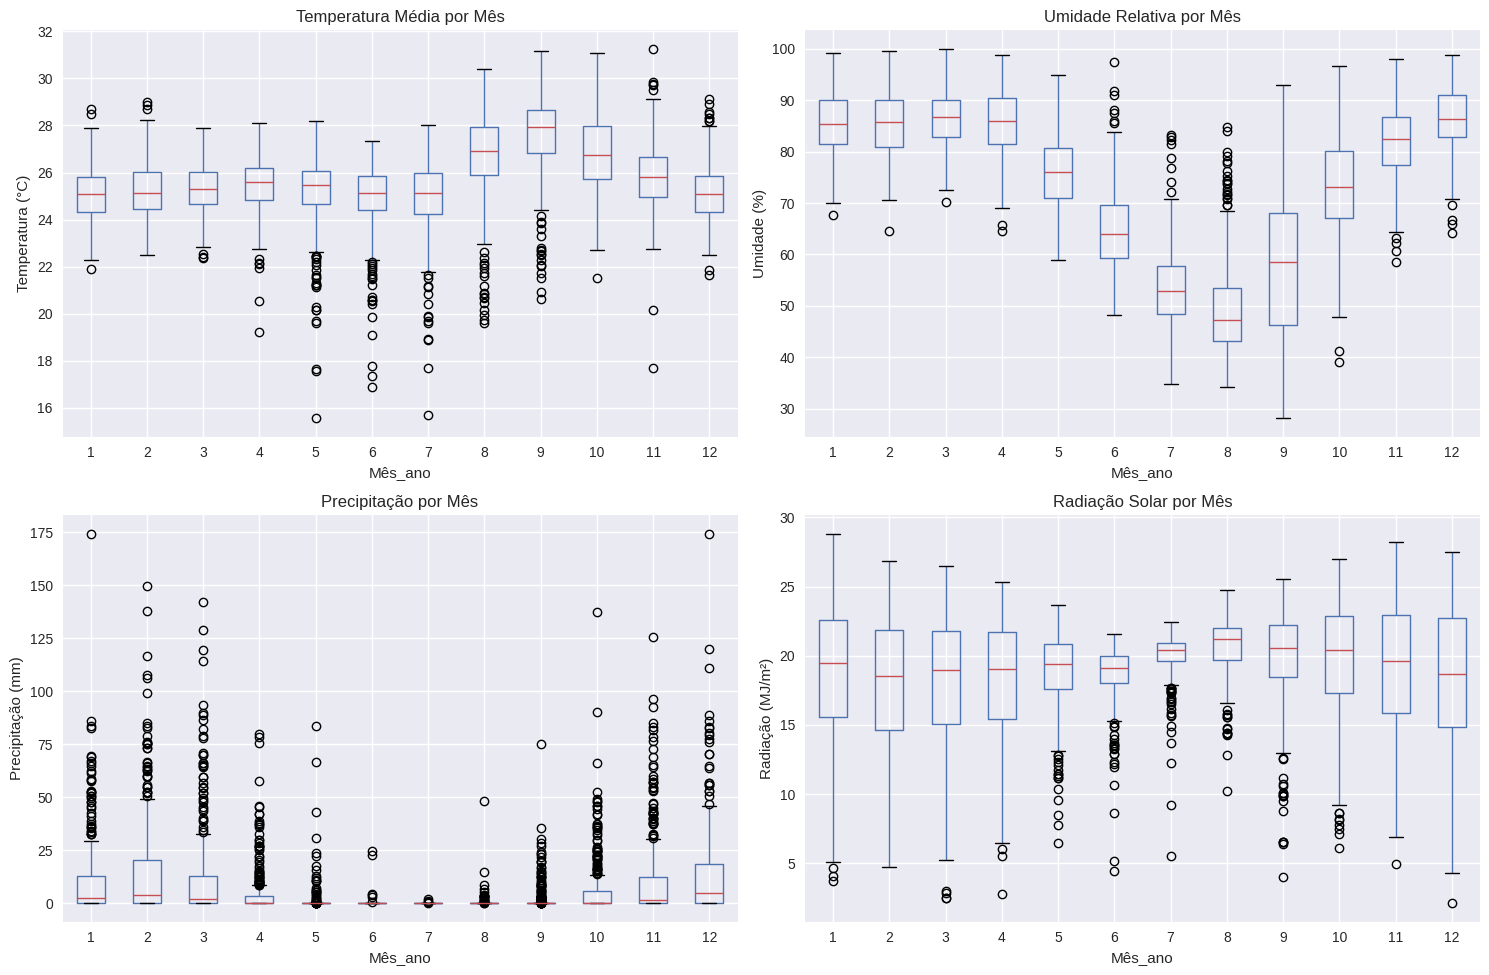

In [17]:
print("=== AN√ÅLISE DE SAZONALIDADE ===")

# Adicionar coluna de m√™s para an√°lise sazonal
df['M√™s_ano'] = df['Data'].dt.month

# Boxplots por m√™s para vari√°veis principais
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Temperatura por m√™s
df.boxplot(column='Temperatura m√©dia do ar', by='M√™s_ano', ax=axes[0,0])
axes[0,0].set_title('Temperatura M√©dia por M√™s')
axes[0,0].set_ylabel('Temperatura (¬∞C)')

# Umidade por m√™s
df.boxplot(column='Umidade relativa m√©dia do ar', by='M√™s_ano', ax=axes[0,1])
axes[0,1].set_title('Umidade Relativa por M√™s')
axes[0,1].set_ylabel('Umidade (%)')

# Precipita√ß√£o por m√™s
df.boxplot(column='Precipita√ß√£o acumulada', by='M√™s_ano', ax=axes[1,0])
axes[1,0].set_title('Precipita√ß√£o por M√™s')
axes[1,0].set_ylabel('Precipita√ß√£o (mm)')

# Radia√ß√£o por m√™s
df.boxplot(column='Radia√ß√£o solar global', by='M√™s_ano', ax=axes[1,1])
axes[1,1].set_title('Radia√ß√£o Solar por M√™s')
axes[1,1].set_ylabel('Radia√ß√£o (MJ/m¬≤)')

plt.suptitle('')  # Remove t√≠tulo autom√°tico
plt.tight_layout()
plt.show()

=== AN√ÅLISE DE AUTOCORRELA√á√ÉO ===


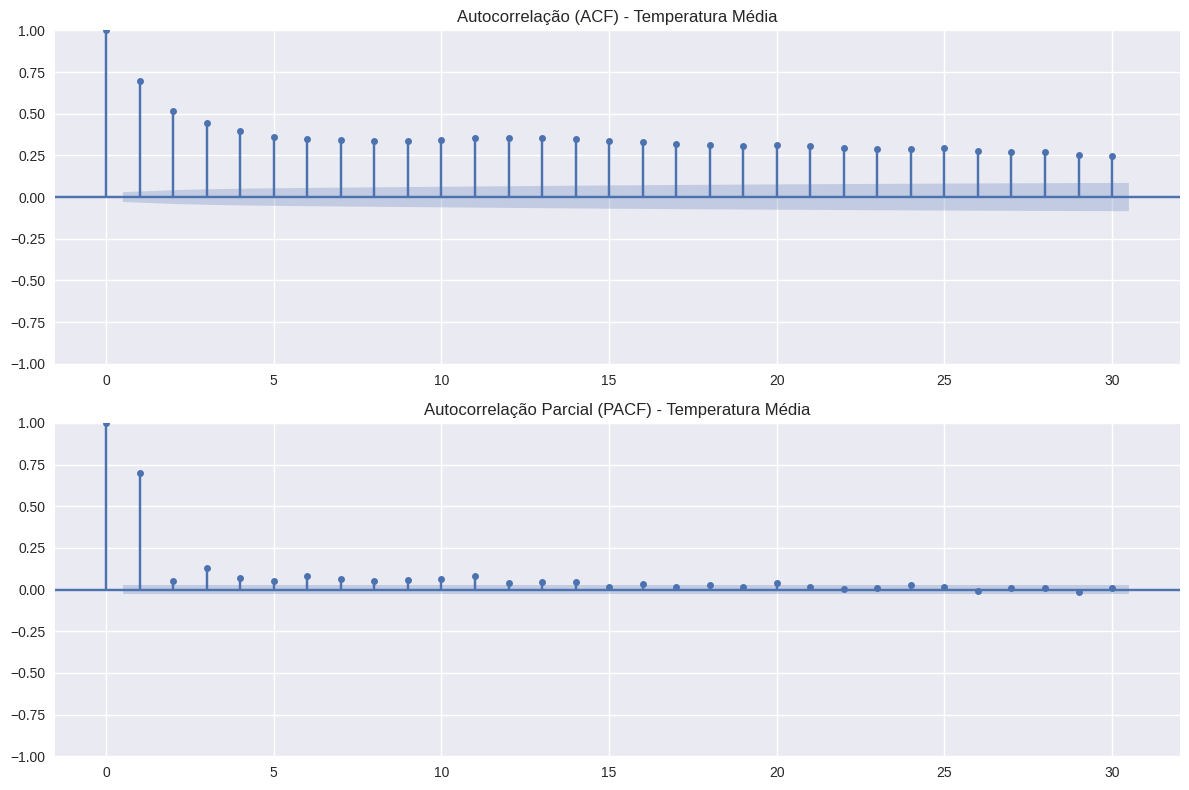

In [18]:
print("=== AN√ÅLISE DE AUTOCORRELA√á√ÉO ===")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF e PACF para temperatura
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df['Temperatura m√©dia do ar'].dropna(), ax=ax1, lags=30)
ax1.set_title('Autocorrela√ß√£o (ACF) - Temperatura M√©dia')

plot_pacf(df['Temperatura m√©dia do ar'].dropna(), ax=ax2, lags=30)
ax2.set_title('Autocorrela√ß√£o Parcial (PACF) - Temperatura M√©dia')

plt.tight_layout()
plt.show()

In [19]:
# Lags para vari√°veis principais (1, 2, 3 dias)
lags_variables = ['Temperatura m√°xima do ar', 'Umidade relativa m√©dia do ar',
                 'Precipita√ß√£o acumulada', 'Radia√ß√£o solar global']
lags_days = [1, 2, 3]

In [20]:
# M√©dias m√≥veis de 3 dias
rolling_variables = ['Temperatura m√°xima do ar', 'Umidade relativa m√©dia do ar',
                    'Precipita√ß√£o acumulada']
window_size = 3

In [21]:
# Dummies de m√™s e esta√ß√£o
seasonal_features = {
    'month': True,           # Dummy de m√™s (1-12)
    'season_dry_wet': True,  # Esta√ß√£o seca/chuvosa
    'day_of_year_cyclic': True  # Codifica√ß√£o c√≠clica
}

In [22]:
transformations = {
    'Precipita√ß√£o acumulada': 'log1p',  # Para assimetria positiva
    'other_variables': 'standardize'    # StandardScaler para demais
}

In [23]:
print("=== PASSO 3 - DEFINI√á√ÉO DE VARI√ÅVEIS ALVO E PREDITORAS ===")

# 1. Criar vari√°veis alvo (D+1) - previs√£o para o pr√≥ximo dia
df['Tmax_alvo'] = df['Temperatura m√°xima do ar'].shift(-1)
df['UR_alvo'] = df['Umidade relativa m√©dia do ar'].shift(-1)
df['Precip_alvo'] = df['Precipita√ß√£o acumulada'].shift(-1)

print("‚úÖ Vari√°veis alvo criadas:")
print("   - Tmax_alvo (Temperatura m√°xima D+1)")
print("   - UR_alvo (Umidade relativa m√©dia D+1)")
print("   - Precip_alvo (Precipita√ß√£o acumulada D+1)")

=== PASSO 3 - DEFINI√á√ÉO DE VARI√ÅVEIS ALVO E PREDITORAS ===
‚úÖ Vari√°veis alvo criadas:
   - Tmax_alvo (Temperatura m√°xima D+1)
   - UR_alvo (Umidade relativa m√©dia D+1)
   - Precip_alvo (Precipita√ß√£o acumulada D+1)


In [24]:
# 2. Lista de preditoras base (vari√°veis do dia atual)
preditoras_base = [
    'Temperatura m√°xima do ar',
    'Umidade relativa m√©dia do ar',
    'Precipita√ß√£o acumulada',
    'Radia√ß√£o solar global',
    'Velocidade m√©dia do vento',
    'Dire√ß√£o predominante do vento'
]

print(f"\n‚úÖ Preditoras base selecionadas ({len(preditoras_base)} vari√°veis):")
for pred in preditoras_base:
    print(f"   - {pred}")


‚úÖ Preditoras base selecionadas (6 vari√°veis):
   - Temperatura m√°xima do ar
   - Umidade relativa m√©dia do ar
   - Precipita√ß√£o acumulada
   - Radia√ß√£o solar global
   - Velocidade m√©dia do vento
   - Dire√ß√£o predominante do vento


In [25]:
# 3. Verificar valores nulos e estat√≠sticas
print("\n=== VERIFICA√á√ÉO DE QUALIDADE ===")

# Valores nulos nas vari√°veis alvo
null_alvo = df[['Tmax_alvo', 'UR_alvo', 'Precip_alvo']].isnull().sum()
print("Valores nulos nas vari√°veis alvo:")
for var, null_count in null_alvo.items():
    print(f"   {var}: {null_count} nulos ({null_count/len(df)*100:.2f}%)")

# Estat√≠sticas das vari√°veis alvo
print("\nEstat√≠sticas das vari√°veis alvo:")
alvo_stats = df[['Tmax_alvo', 'UR_alvo', 'Precip_alvo']].describe()
print(alvo_stats)


=== VERIFICA√á√ÉO DE QUALIDADE ===
Valores nulos nas vari√°veis alvo:
   Tmax_alvo: 13 nulos (0.29%)
   UR_alvo: 13 nulos (0.29%)
   Precip_alvo: 13 nulos (0.29%)

Estat√≠sticas das vari√°veis alvo:
         Tmax_alvo      UR_alvo  Precip_alvo
count  4450.000000  4450.000000  4450.000000
mean     33.145807    73.510551     6.201558
std       2.843625    15.654579    15.570037
min      22.900000    28.150000     0.000000
25%      31.580000    61.875000     0.000000
50%      33.110000    77.895000     0.000000
75%      34.810000    85.900000     3.810000
max      40.870000   100.000000   174.200000


In [26]:
# 4. Criar features temporais b√°sicas para engenharia de atributos
df['Ano'] = df['Data'].dt.year
df['Mes'] = df['Data'].dt.month
df['Dia_ano'] = df['Data'].dt.dayofyear

print(f"\n‚úÖ Features temporais criadas:")
print(f"   Per√≠odo dos dados: {df['Data'].min()} at√© {df['Data'].max()}")
print(f"   Total de dias: {len(df)}")
print(f"   Anos abrangidos: {df['Ano'].min()} - {df['Ano'].max()}")


‚úÖ Features temporais criadas:
   Per√≠odo dos dados: 2013-08-13 00:00:00 at√© 2025-10-31 00:00:00
   Total de dias: 4463
   Anos abrangidos: 2013 - 2025


In [27]:
# 5. Definir estrat√©gia para engenharia de features
print("\n=== ESTRAT√âGIA PARA ENGENHARIA DE FEATURES (PR√ìXIMO PASSO) ===")

lags_config = {
    'variaveis': ['Temperatura m√°xima do ar', 'Umidade relativa m√©dia do ar',
                 'Precipita√ß√£o acumulada', 'Radia√ß√£o Solar global'],
    'dias': [1, 2, 3]
}

medias_moveis_config = {
    'variaveis': ['Temperatura m√°xima do ar', 'Umidade relativa m√©dia do ar',
                 'Precipita√ß√£o acumulada'],
    'janela': 3
}

sazonais_config = {
    'mes_dummy': True,
    'estacao_seca_chuvosa': True,
    'dia_ano_ciclico': True
}

print("üìã Configura√ß√£o para lags:", lags_config)
print("üìã Configura√ß√£o para m√©dias m√≥veis:", medias_moveis_config)
print("üìã Configura√ß√£o para features sazonais:", sazonais_config)


=== ESTRAT√âGIA PARA ENGENHARIA DE FEATURES (PR√ìXIMO PASSO) ===
üìã Configura√ß√£o para lags: {'variaveis': ['Temperatura m√°xima do ar', 'Umidade relativa m√©dia do ar', 'Precipita√ß√£o acumulada', 'Radia√ß√£o Solar global'], 'dias': [1, 2, 3]}
üìã Configura√ß√£o para m√©dias m√≥veis: {'variaveis': ['Temperatura m√°xima do ar', 'Umidade relativa m√©dia do ar', 'Precipita√ß√£o acumulada'], 'janela': 3}
üìã Configura√ß√£o para features sazonais: {'mes_dummy': True, 'estacao_seca_chuvosa': True, 'dia_ano_ciclico': True}


In [28]:
# 6. Verifica√ß√£o final do dataset
print("\n=== VERIFICA√á√ÉO FINAL DO DATASET ===")
print(f"Dimens√µes do DataFrame: {df.shape}")
print(f"Colunas dispon√≠veis: {len(df.columns)}")
print(f"Amostra das primeiras linhas com vari√°veis alvo:")
display(df[['Data', 'Temperatura m√°xima do ar', 'Tmax_alvo',
           'Umidade relativa m√©dia do ar', 'UR_alvo',
           'Precipita√ß√£o acumulada', 'Precip_alvo']].head(10))


=== VERIFICA√á√ÉO FINAL DO DATASET ===
Dimens√µes do DataFrame: (4463, 26)
Colunas dispon√≠veis: 26
Amostra das primeiras linhas com vari√°veis alvo:


Data  Temperatura m√°xima do ar  Tmax_alvo  \
0 2013-08-13                     36.06      30.52   
1 2013-08-14                     30.52      29.86   
2 2013-08-15                     29.86      35.76   
3 2013-08-16                     35.76      36.33   
4 2013-08-17                     36.33      36.36   
5 2013-08-18                     36.36      36.38   
6 2013-08-19                     36.38      36.18   
7 2013-08-20                     36.18      36.44   
8 2013-08-21                     36.44      36.09   
9 2013-08-22                     36.09      36.23   

   Umidade relativa m√©dia do ar  UR_alvo  Precipita√ß√£o acumulada  Precip_alvo  
0                         54.09    55.49                     0.0          0.0  
1                         55.49    46.33                     0.0          0.0  
2                         46.33    46.13                     0.0          0.0  
3                         46.13    47.76                     0.0          0.0  
4                         47.76    45.92                     0.0          0.0  
5                         45.92    49.54                     0.0          0.0  
6                         49.54    46.84                     0.0          0.0  
7                         46.84    38.67                     0.0          0.0  
8                         38.67    41.07                     0.0          0.0  
9                         41.07    44.46                     0.0          0.0

In [29]:
print("=== 4.1. TRATAMENTO DE VALORES MISSING ===")

from sklearn.impute import KNNImputer
import numpy as np

# Verificar valores missing antes do tratamento
print("Valores missing antes do tratamento:")
missing_before = df[preditoras_base].isnull().sum()
print(missing_before[missing_before > 0])

# Estrat√©gia: Como temos dados di√°rios (n√£o hor√°rios), aplicaremos KNN Imputer para dias completos
print("\nAplicando KNN Imputer para valores missing...")

# Criar imputer KNN
knn_imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')

# Aplicar imputa√ß√£o nas preditoras base
df[preditoras_base] = knn_imputer.fit_transform(df[preditoras_base])

# Verificar valores missing ap√≥s o tratamento
missing_after = df[preditoras_base].isnull().sum()
print("Valores missing ap√≥s KNN Imputer:")
print(missing_after[missing_after > 0])

=== 4.1. TRATAMENTO DE VALORES MISSING ===
Valores missing antes do tratamento:
Temperatura m√°xima do ar         12
Umidade relativa m√©dia do ar     12
Precipita√ß√£o acumulada           12
Radia√ß√£o solar global            12
Velocidade m√©dia do vento        12
Dire√ß√£o predominante do vento    12
dtype: int64

Aplicando KNN Imputer para valores missing...
Valores missing ap√≥s KNN Imputer:
Series([], dtype: int64)


In [30]:
print("\n=== 4.2. CRIA√á√ÉO DE LAGS TEMPORAIS ===")

# Vari√°veis para criar lags
lags_variables = [
    'Temperatura m√°xima do ar',
    'Umidade relativa m√©dia do ar',
    'Precipita√ß√£o acumulada',
    'Radia√ß√£o solar global'
]

# Criar lags para 1, 2, 3 dias
lags_days = [1, 2, 3]

for var in lags_variables:
    for lag in lags_days:
        lag_col_name = f'{var}_lag_{lag}'
        df[lag_col_name] = df[var].shift(lag)
        print(f"‚úÖ Criado: {lag_col_name}")

print(f"Total de features de lag criadas: {len(lags_variables) * len(lags_days)}")


=== 4.2. CRIA√á√ÉO DE LAGS TEMPORAIS ===
‚úÖ Criado: Temperatura m√°xima do ar_lag_1
‚úÖ Criado: Temperatura m√°xima do ar_lag_2
‚úÖ Criado: Temperatura m√°xima do ar_lag_3
‚úÖ Criado: Umidade relativa m√©dia do ar_lag_1
‚úÖ Criado: Umidade relativa m√©dia do ar_lag_2
‚úÖ Criado: Umidade relativa m√©dia do ar_lag_3
‚úÖ Criado: Precipita√ß√£o acumulada_lag_1
‚úÖ Criado: Precipita√ß√£o acumulada_lag_2
‚úÖ Criado: Precipita√ß√£o acumulada_lag_3
‚úÖ Criado: Radia√ß√£o solar global_lag_1
‚úÖ Criado: Radia√ß√£o solar global_lag_2
‚úÖ Criado: Radia√ß√£o solar global_lag_3
Total de features de lag criadas: 12


In [31]:
print("\n=== 4.3. CRIA√á√ÉO DE M√âDIAS M√ìVEIS ===")

# Vari√°veis para m√©dias m√≥veis
rolling_variables = [
    'Temperatura m√°xima do ar',
    'Umidade relativa m√©dia do ar',
    'Precipita√ß√£o acumulada'
]

# Criar m√©dias m√≥veis de 3 dias
window_size = 3

for var in rolling_variables:
    ma_col_name = f'{var}_ma_{window_size}'
    df[ma_col_name] = df[var].rolling(window=window_size, min_periods=1).mean()
    print(f"‚úÖ Criado: {ma_col_name}")

print(f"Total de features de m√©dia m√≥vel criadas: {len(rolling_variables)}")


=== 4.3. CRIA√á√ÉO DE M√âDIAS M√ìVEIS ===
‚úÖ Criado: Temperatura m√°xima do ar_ma_3
‚úÖ Criado: Umidade relativa m√©dia do ar_ma_3
‚úÖ Criado: Precipita√ß√£o acumulada_ma_3
Total de features de m√©dia m√≥vel criadas: 3


In [32]:
print("\n=== 4.4. CRIA√á√ÉO DE FEATURES SAZONAIS ===")

# 4.4.1. Dummies de m√™s (1-12)
print("Criando dummies de m√™s...")
mes_dummies = pd.get_dummies(df['Mes'], prefix='mes')
df = pd.concat([df, mes_dummies], axis=1)
print(f"‚úÖ Dummies de m√™s criadas: {mes_dummies.columns.tolist()}")

# 4.4.2. Dummy de esta√ß√£o seca/chuvosa
# Defini√ß√£o: Seca (Abr-Set) vs Chuvosa (Out-Mar) - padr√£o Amaz√¥nia
print("\nCriando dummy esta√ß√£o seca/chuvosa...")
df['estacao_seca'] = df['Mes'].apply(lambda x: 1 if 4 <= x <= 9 else 0)
print("‚úÖ Esta√ß√£o seca/chuvosa criada: estacao_seca (1=seca, 0=chuvosa)")

# 4.4.3. Codifica√ß√£o c√≠clica do dia do ano
print("\nCriando codifica√ß√£o c√≠clica do dia do ano...")
df['dia_ano_sin'] = np.sin(2 * np.pi * df['Dia_ano'] / 365)
df['dia_ano_cos'] = np.cos(2 * np.pi * df['Dia_ano'] / 365)
print("‚úÖ Codifica√ß√£o c√≠clica criada: dia_ano_sin, dia_ano_cos")


=== 4.4. CRIA√á√ÉO DE FEATURES SAZONAIS ===
Criando dummies de m√™s...
‚úÖ Dummies de m√™s criadas: ['mes_1', 'mes_2', 'mes_3', 'mes_4', 'mes_5', 'mes_6', 'mes_7', 'mes_8', 'mes_9', 'mes_10', 'mes_11', 'mes_12']

Criando dummy esta√ß√£o seca/chuvosa...
‚úÖ Esta√ß√£o seca/chuvosa criada: estacao_seca (1=seca, 0=chuvosa)

Criando codifica√ß√£o c√≠clica do dia do ano...
‚úÖ Codifica√ß√£o c√≠clica criada: dia_ano_sin, dia_ano_cos


In [33]:
print("\n=== 4.5. TRANSFORMA√á√ïES DAS VARI√ÅVEIS ===")

from sklearn.preprocessing import StandardScaler
import numpy as np

# 4.5.1. Transforma√ß√£o log1p para precipita√ß√£o (original e lags)
print("Aplicando log1p para precipita√ß√£o...")
precip_cols = [col for col in df.columns if 'Precipita√ß√£o' in col and 'lag' in col]
precip_cols.append('Precipita√ß√£o acumulada')

for col in precip_cols:
    if col in df.columns:
        df[f'{col}_log1p'] = np.log1p(df[col])
        print(f"‚úÖ Transformada: {col} -> {col}_log1p")

# 4.5.2. Identificar vari√°veis para padroniza√ß√£o
# Excluir vari√°veis j√° transformadas, dummies e vari√°veis c√≠clicas
vars_to_exclude = precip_cols + ['estacao_seca', 'dia_ano_sin', 'dia_ano_cos'] + \
                 mes_dummies.columns.tolist() + ['Ano', 'Mes', 'Dia_ano', 'Data'] + \
                 ['Tmax_alvo', 'UR_alvo', 'Precip_alvo']

# Vari√°veis num√©ricas para padronizar
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
vars_to_scale = [var for var in numeric_vars if var not in vars_to_exclude and not var.endswith('_log1p')]

print(f"\nVari√°veis para padroniza√ß√£o ({len(vars_to_scale)}):")
for var in vars_to_scale:
    print(f"  - {var}")

# Aplicar StandardScaler
print("\nAplicando StandardScaler...")
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[vars_to_scale]),
                        columns=[f'{var}_scaled' for var in vars_to_scale],
                        index=df.index)
df = pd.concat([df, df_scaled], axis=1)
print("‚úÖ Padroniza√ß√£o conclu√≠da")


=== 4.5. TRANSFORMA√á√ïES DAS VARI√ÅVEIS ===
Aplicando log1p para precipita√ß√£o...
‚úÖ Transformada: Precipita√ß√£o acumulada_lag_1 -> Precipita√ß√£o acumulada_lag_1_log1p
‚úÖ Transformada: Precipita√ß√£o acumulada_lag_2 -> Precipita√ß√£o acumulada_lag_2_log1p
‚úÖ Transformada: Precipita√ß√£o acumulada_lag_3 -> Precipita√ß√£o acumulada_lag_3_log1p
‚úÖ Transformada: Precipita√ß√£o acumulada -> Precipita√ß√£o acumulada_log1p

Vari√°veis para padroniza√ß√£o (25):
  - Temperatura m√©dia do ar
  - Temperatura m√°xima do ar
  - Temperatura m√≠nima do ar
  - Umidade relativa m√©dia do ar
  - Umidade relativa m√°xima do ar
  - Umidade relativa m√≠nima do ar
  - Velocidade m√°xima do vento
  - Radia√ß√£o solar global
  - Radia√ß√£o fotossinteticamente ativa
  - Velocidade m√©dia do vento
  - Dire√ß√£o predominante do vento
  - M√™s_num
  - M√™s_ano
  - Temperatura m√°xima do ar_lag_1
  - Temperatura m√°xima do ar_lag_2
  - Temperatura m√°xima do ar_lag_3
  - Umidade relativa m√©dia do ar_lag_

In [34]:
print("\n=== 4.6. RESUMO DAS FEATURES CRIADAS ===")

# Contar tipos de features
lag_features = [col for col in df.columns if 'lag' in col]
ma_features = [col for col in df.columns if 'ma_' in col]
month_features = [col for col in df.columns if 'mes_' in col]
cyclic_features = ['dia_ano_sin', 'dia_ano_cos']
season_features = ['estacao_seca']
log_features = [col for col in df.columns if 'log1p' in col]
scaled_features = [col for col in df.columns if 'scaled' in col]

print(f"üìä Total de features criadas por categoria:")
print(f"   ‚Ä¢ Lags temporais: {len(lag_features)}")
print(f"   ‚Ä¢ M√©dias m√≥veis: {len(ma_features)}")
print(f"   ‚Ä¢ Dummies de m√™s: {len(month_features)}")
print(f"   ‚Ä¢ Features c√≠clicas: {len(cyclic_features)}")
print(f"   ‚Ä¢ Features de esta√ß√£o: {len(season_features)}")
print(f"   ‚Ä¢ Transforma√ß√µes log1p: {len(log_features)}")
print(f"   ‚Ä¢ Vari√°veis padronizadas: {len(scaled_features)}")
print(f"   ‚Ä¢ Total de colunas no DataFrame: {len(df.columns)}")

# Mostrar algumas features de exemplo
print(f"\nüîç Exemplos de features criadas:")
print(f"   Lags: {lag_features[:3]}...")
print(f"   M√©dias m√≥veis: {ma_features}")
print(f"   Transformadas: {log_features[:2]}...")
print(f"   Padronizadas: {scaled_features[:3]}...")


=== 4.6. RESUMO DAS FEATURES CRIADAS ===
üìä Total de features criadas por categoria:
   ‚Ä¢ Lags temporais: 24
   ‚Ä¢ M√©dias m√≥veis: 6
   ‚Ä¢ Dummies de m√™s: 12
   ‚Ä¢ Features c√≠clicas: 2
   ‚Ä¢ Features de esta√ß√£o: 1
   ‚Ä¢ Transforma√ß√µes log1p: 4
   ‚Ä¢ Vari√°veis padronizadas: 25
   ‚Ä¢ Total de colunas no DataFrame: 85

üîç Exemplos de features criadas:
   Lags: ['Temperatura m√°xima do ar_lag_1', 'Temperatura m√°xima do ar_lag_2', 'Temperatura m√°xima do ar_lag_3']...
   M√©dias m√≥veis: ['Temperatura m√°xima do ar_ma_3', 'Umidade relativa m√©dia do ar_ma_3', 'Precipita√ß√£o acumulada_ma_3', 'Temperatura m√°xima do ar_ma_3_scaled', 'Umidade relativa m√©dia do ar_ma_3_scaled', 'Precipita√ß√£o acumulada_ma_3_scaled']
   Transformadas: ['Precipita√ß√£o acumulada_lag_1_log1p', 'Precipita√ß√£o acumulada_lag_2_log1p']...
   Padronizadas: ['Temperatura m√©dia do ar_scaled', 'Temperatura m√°xima do ar_scaled', 'Temperatura m√≠nima do ar_scaled']...


In [35]:
print("\n=== 4.7. LIMPEZA DE VALORES NULOS ===")

# Remover linhas com valores nulos (gerados pelos lags)
initial_rows = len(df)
df_clean = df.dropna().copy()
final_rows = len(df_clean)

print(f"Linhas antes da limpeza: {initial_rows}")
print(f"Linhas ap√≥s remover nulos: {final_rows}")
print(f"Linhas removidas: {initial_rows - final_rows} ({((initial_rows - final_rows)/initial_rows)*100:.2f}%)")

df = df_clean


=== 4.7. LIMPEZA DE VALORES NULOS ===
Linhas antes da limpeza: 4463
Linhas ap√≥s remover nulos: 4447
Linhas removidas: 16 (0.36%)


In [36]:
print("=== 1. VERIFICA√á√ÉO DA ESTRUTURA DO DATAFRAME ===")

print(f"üìä Dimens√µes do DataFrame: {df.shape}")
print(f"üìÖ Per√≠odo dos dados: {df['Data'].min()} at√© {df['Data'].max()}")
print(f"üî¢ Total de colunas: {len(df.columns)}")
print(f"üìù Total de linhas ap√≥s limpeza: {len(df)}")

# Verificar tipos de dados
print("\n=== TIPOS DE DADOS ===")
print(df.dtypes.value_counts())

=== 1. VERIFICA√á√ÉO DA ESTRUTURA DO DATAFRAME ===
üìä Dimens√µes do DataFrame: (4447, 85)
üìÖ Per√≠odo dos dados: 2013-08-16 00:00:00 at√© 2025-10-18 00:00:00
üî¢ Total de colunas: 85
üìù Total de linhas ap√≥s limpeza: 4447

=== TIPOS DE DADOS ===
float64           61
bool              12
object             5
int32              4
int64              2
datetime64[ns]     1
Name: count, dtype: int64


In [37]:
print("\n=== 2. VERIFICA√á√ÉO DE VALORES MISSING ===")

# Verificar valores missing em todas as colunas
missing_summary = df.isnull().sum()
missing_cols = missing_summary[missing_summary > 0]

if len(missing_cols) == 0:
    print("‚úÖ NENHUM valor missing encontrado!")
else:
    print("‚ö†Ô∏è Valores missing encontrados:")
    for col, count in missing_cols.items():
        print(f"   {col}: {count} valores ({count/len(df)*100:.2f}%)")


=== 2. VERIFICA√á√ÉO DE VALORES MISSING ===
‚úÖ NENHUM valor missing encontrado!


In [38]:
print("\n=== 3. VERIFICA√á√ÉO DAS VARI√ÅVEIS ALVO ===")

alvo_vars = ['Tmax_alvo', 'UR_alvo', 'Precip_alvo']

for var in alvo_vars:
    print(f"\nüìà {var}:")
    print(f"   - N√£o nulos: {df[var].notna().sum()}")
    print(f"   - M√©dia: {df[var].mean():.2f}")
    print(f"   - Std: {df[var].std():.2f}")
    print(f"   - Min: {df[var].min():.2f}")
    print(f"   - Max: {df[var].max():.2f}")

    # Verificar se h√° valores imposs√≠veis
    if var == 'Precip_alvo':
        neg_precip = (df[var] < 0).sum()
        if neg_precip > 0:
            print(f"   ‚ö†Ô∏è VALORES NEGATIVOS: {neg_precip}")


=== 3. VERIFICA√á√ÉO DAS VARI√ÅVEIS ALVO ===

üìà Tmax_alvo:
   - N√£o nulos: 4447
   - M√©dia: 33.15
   - Std: 2.84
   - Min: 22.90
   - Max: 40.87

üìà UR_alvo:
   - N√£o nulos: 4447
   - M√©dia: 73.53
   - Std: 15.65
   - Min: 28.15
   - Max: 100.00

üìà Precip_alvo:
   - N√£o nulos: 4447
   - M√©dia: 6.21
   - Std: 15.57
   - Min: 0.00
   - Max: 174.20


In [39]:
print("\n=== 4. VERIFICA√á√ÉO DAS FEATURES CRIADAS ===")

# Contar features por tipo
feature_types = {
    'Lags': [col for col in df.columns if 'lag' in col],
    'M√©dias M√≥veis': [col for col in df.columns if 'ma_' in col],
    'M√™s Dummies': [col for col in df.columns if col.startswith('mes_')],
    'Transforma√ß√µes Log': [col for col in df.columns if 'log1p' in col],
    'Vari√°veis Escaladas': [col for col in df.columns if 'scaled' in col],
    'Features C√≠clicas': ['dia_ano_sin', 'dia_ano_cos'],
    'Esta√ß√£o': ['estacao_seca']
}

print("üìã Resumo de Features Criadas:")
for feature_type, features in feature_types.items():
    print(f"   ‚Ä¢ {feature_type}: {len(features)} features")
    if features and len(features) <= 5:  # Mostrar at√© 5 exemplos
        print(f"     Ex: {features[:3]}{'...' if len(features) > 3 else ''}")

# Verificar se todas as features esperadas foram criadas
expected_features = {
    'Lags': f"Esperado: {4*3}=12 | Criado: {len(feature_types['Lags'])}",
    'M√©dias M√≥veis': f"Esperado: 3 | Criado: {len(feature_types['M√©dias M√≥veis'])}",
    'M√™s Dummies': f"Esperado: 12 | Criado: {len(feature_types['M√™s Dummies'])}",
    'Features C√≠clicas': f"Esperado: 2 | Criado: {len(feature_types['Features C√≠clicas'])}"
}

print("\n‚úÖ Confirma√ß√£o de Features:")
for feature, status in expected_features.items():
    print(f"   {feature}: {status}")


=== 4. VERIFICA√á√ÉO DAS FEATURES CRIADAS ===
üìã Resumo de Features Criadas:
   ‚Ä¢ Lags: 24 features
   ‚Ä¢ M√©dias M√≥veis: 6 features
   ‚Ä¢ M√™s Dummies: 12 features
   ‚Ä¢ Transforma√ß√µes Log: 4 features
     Ex: ['Precipita√ß√£o acumulada_lag_1_log1p', 'Precipita√ß√£o acumulada_lag_2_log1p', 'Precipita√ß√£o acumulada_lag_3_log1p']...
   ‚Ä¢ Vari√°veis Escaladas: 25 features
   ‚Ä¢ Features C√≠clicas: 2 features
     Ex: ['dia_ano_sin', 'dia_ano_cos']
   ‚Ä¢ Esta√ß√£o: 1 features
     Ex: ['estacao_seca']

‚úÖ Confirma√ß√£o de Features:
   Lags: Esperado: 12=12 | Criado: 24
   M√©dias M√≥veis: Esperado: 3 | Criado: 6
   M√™s Dummies: Esperado: 12 | Criado: 12
   Features C√≠clicas: Esperado: 2 | Criado: 2


In [40]:
print("\n=== 5. VERIFICA√á√ÉO DE VALORES EXTREMOS ===")

# Verificar se h√° valores infinitos
inf_count = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"Valores infinitos: {inf_count}")

# Verificar outliers nas vari√°veis principais usando IQR
def check_outliers(series, name):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return len(outliers)

print("\nüîç Outliers nas vari√°veis principais (m√©todo IQR):")
main_vars = ['Tmax_alvo', 'UR_alvo', 'Precip_alvo', 'Temperatura m√°xima do ar',
             'Umidade relativa m√©dia do ar', 'Precipita√ß√£o acumulada']

for var in main_vars:
    if var in df.columns:
        outliers = check_outliers(df[var], var)
        print(f"   {var}: {outliers} outliers ({outliers/len(df)*100:.1f}%)")


=== 5. VERIFICA√á√ÉO DE VALORES EXTREMOS ===
Valores infinitos: 0

üîç Outliers nas vari√°veis principais (m√©todo IQR):
   Tmax_alvo: 116 outliers (2.6%)
   UR_alvo: 0 outliers (0.0%)
   Precip_alvo: 747 outliers (16.8%)
   Temperatura m√°xima do ar: 116 outliers (2.6%)
   Umidade relativa m√©dia do ar: 0 outliers (0.0%)
   Precipita√ß√£o acumulada: 747 outliers (16.8%)


In [41]:
print("\n=== 6. VERIFICA√á√ÉO DA SAZONALIDADE ===")

# Verificar distribui√ß√£o das esta√ß√µes
if 'estacao_seca' in df.columns:
    estacao_counts = df['estacao_seca'].value_counts()
    print("Distribui√ß√£o das esta√ß√µes:")
    print(f"   Esta√ß√£o seca (1): {estacao_counts.get(1, 0)} dias ({estacao_counts.get(1, 0)/len(df)*100:.1f}%)")
    print(f"   Esta√ß√£o chuvosa (0): {estacao_counts.get(0, 0)} dias ({estacao_counts.get(0, 0)/len(df)*100:.1f}%)")

# Verificar se a codifica√ß√£o c√≠clica est√° correta
if all(col in df.columns for col in ['dia_ano_sin', 'dia_ano_cos']):
    print(f"\n‚úÖ Codifica√ß√£o c√≠clica:")
    print(f"   dia_ano_sin: [{df['dia_ano_sin'].min():.3f}, {df['dia_ano_sin'].max():.3f}]")
    print(f"   dia_ano_cos: [{df['dia_ano_cos'].min():.3f}, {df['dia_ano_cos'].max():.3f}]")


=== 6. VERIFICA√á√ÉO DA SAZONALIDADE ===
Distribui√ß√£o das esta√ß√µes:
   Esta√ß√£o seca (1): 2242 dias (50.4%)
   Esta√ß√£o chuvosa (0): 2205 dias (49.6%)

‚úÖ Codifica√ß√£o c√≠clica:
   dia_ano_sin: [-1.000, 1.000]
   dia_ano_cos: [-1.000, 1.000]


In [42]:
print("\n=== 7. VERIFICA√á√ÉO DAS TRANSFORMA√á√ïES ===")

# Verificar transforma√ß√£o log1p na precipita√ß√£o
precip_cols = [col for col in df.columns if 'Precipita√ß√£o' in col and 'log1p' in col]
if precip_cols:
    print("‚úÖ Transforma√ß√£o log1p aplicada em:")
    for col in precip_cols:
        original_col = col.replace('_log1p', '')
        if original_col in df.columns:
            # Verificar se n√£o h√° valores negativos ap√≥s transforma√ß√£o
            neg_values = (df[col] < 0).sum()
            print(f"   {original_col} -> {col} (valores negativos: {neg_values})")

# Verificar padroniza√ß√£o
scaled_cols = [col for col in df.columns if 'scaled' in col]
if scaled_cols:
    sample_scaled = scaled_cols[:3]
    print(f"\n‚úÖ Padroniza√ß√£o aplicada em {len(scaled_cols)} vari√°veis")
    print(f"   Exemplo - Estat√≠sticas de {sample_scaled[0]}:")
    print(f"      M√©dia: {df[sample_scaled[0]].mean():.6f} (esperado ~0)")
    print(f"      Std: {df[sample_scaled[0]].std():.6f} (esperado ~1)")


=== 7. VERIFICA√á√ÉO DAS TRANSFORMA√á√ïES ===
‚úÖ Transforma√ß√£o log1p aplicada em:
   Precipita√ß√£o acumulada_lag_1 -> Precipita√ß√£o acumulada_lag_1_log1p (valores negativos: 0)
   Precipita√ß√£o acumulada_lag_2 -> Precipita√ß√£o acumulada_lag_2_log1p (valores negativos: 0)
   Precipita√ß√£o acumulada_lag_3 -> Precipita√ß√£o acumulada_lag_3_log1p (valores negativos: 0)
   Precipita√ß√£o acumulada -> Precipita√ß√£o acumulada_log1p (valores negativos: 0)

‚úÖ Padroniza√ß√£o aplicada em 25 vari√°veis
   Exemplo - Estat√≠sticas de Temperatura m√©dia do ar_scaled:
      M√©dia: 0.000750 (esperado ~0)
      Std: 0.999338 (esperado ~1)


In [43]:
print("\n" + "="*50)
print("üìä RELAT√ìRIO FINAL DE SA√öDE DOS DADOS")
print("="*50)

# Resumo geral
issues = []

# Verificar problemas cr√≠ticos
if len(df) < 1000:
    issues.append("‚ö†Ô∏è Dataset muito pequeno (< 1000 linhas)")

if any(df[['Tmax_alvo', 'UR_alvo', 'Precip_alvo']].isnull().sum() > 0):
    issues.append("‚ö†Ô∏è Vari√°veis alvo com valores missing")

if inf_count > 0:
    issues.append("‚ö†Ô∏è Valores infinitos encontrados")

if len([col for col in df.columns if 'lag' in col]) != 12:
    issues.append("‚ö†Ô∏è N√∫mero incorreto de features de lag")

# Resultado final
if not issues:
    print("‚úÖ TODOS OS CHECKS PASSARAM! Dados prontos para modelagem.")
    print("   Voc√™ pode prosseguir para o Passo 5 - Divis√£o dos Dados")
else:
    print("‚ùå PROBLEMAS IDENTIFICADOS:")
    for issue in issues:
        print(f"   {issue}")
    print("\nüîß Resolva os problemas antes de prosseguir.")

print(f"\nüìà Estat√≠sticas finais:")
print(f"   ‚Ä¢ Linhas: {len(df)}")
print(f"   ‚Ä¢ Colunas: {len(df.columns)}")
print(f"   ‚Ä¢ Per√≠odo: {df['Data'].min().strftime('%Y-%m-%d')} a {df['Data'].max().strftime('%Y-%m-%d')}")
print(f"   ‚Ä¢ Vari√°veis alvo: 3 (Tmax, UR, Precip - D+1)")
print(f"   ‚Ä¢ Features preditoras: {len(df.columns) - 8}")  # excluindo colunas auxiliares e alvos


üìä RELAT√ìRIO FINAL DE SA√öDE DOS DADOS
‚ùå PROBLEMAS IDENTIFICADOS:
   ‚ö†Ô∏è N√∫mero incorreto de features de lag

üîß Resolva os problemas antes de prosseguir.

üìà Estat√≠sticas finais:
   ‚Ä¢ Linhas: 4447
   ‚Ä¢ Colunas: 85
   ‚Ä¢ Per√≠odo: 2013-08-16 a 2025-10-18
   ‚Ä¢ Vari√°veis alvo: 3 (Tmax, UR, Precip - D+1)
   ‚Ä¢ Features preditoras: 77


In [44]:
print("=== CORRE√á√ÉO DE FEATURES DUPLICADAS ===")

# Listar todas as features atuais
all_features = df.columns.tolist()
print(f"Total de features atual: {len(all_features)}")

# Identificar features problem√°ticas
lags_duplicados = [col for col in df.columns if 'lag' in col and ('log1p' in col or 'scaled' in col)]
ma_duplicados = [col for col in df.columns if 'ma_' in col and ('log1p' in col or 'scaled' in col)]

print(f"\nüîç Features de lag duplicadas: {len(lags_duplicados)}")
for lag in lags_duplicados:
    print(f"   - {lag}")

print(f"\nüîç Features de m√©dia m√≥vel duplicadas: {len(ma_duplicados)}")
for ma in ma_duplicados:
    print(f"   - {ma}")

# Manter apenas as features originais (sem transforma√ß√µes nos lags e MAs)
features_para_manter = [col for col in df.columns if not (('lag' in col or 'ma_' in col) and ('log1p' in col or 'scaled' in col))]

print(f"\n‚úÖ Features ap√≥s corre√ß√£o: {len(features_para_manter)}")
df = df[features_para_manter]

=== CORRE√á√ÉO DE FEATURES DUPLICADAS ===
Total de features atual: 85

üîç Features de lag duplicadas: 12
   - Precipita√ß√£o acumulada_lag_1_log1p
   - Precipita√ß√£o acumulada_lag_2_log1p
   - Precipita√ß√£o acumulada_lag_3_log1p
   - Temperatura m√°xima do ar_lag_1_scaled
   - Temperatura m√°xima do ar_lag_2_scaled
   - Temperatura m√°xima do ar_lag_3_scaled
   - Umidade relativa m√©dia do ar_lag_1_scaled
   - Umidade relativa m√©dia do ar_lag_2_scaled
   - Umidade relativa m√©dia do ar_lag_3_scaled
   - Radia√ß√£o solar global_lag_1_scaled
   - Radia√ß√£o solar global_lag_2_scaled
   - Radia√ß√£o solar global_lag_3_scaled

üîç Features de m√©dia m√≥vel duplicadas: 3
   - Temperatura m√°xima do ar_ma_3_scaled
   - Umidade relativa m√©dia do ar_ma_3_scaled
   - Precipita√ß√£o acumulada_ma_3_scaled

‚úÖ Features ap√≥s corre√ß√£o: 70


In [45]:
print("\n=== CORRE√á√ÉO DA ESTA√á√ÉO SECA/CHUVOSA ===")

# Para Sinop-MT (regi√£o amaz√¥nica):
# Esta√ß√£o SECA: Maio a Setembro (5-9)
# Esta√ß√£o CHUVOSA: Outubro a Abril (10-4)

# Remover a coluna antiga
if 'estacao_seca' in df.columns:
    df = df.drop('estacao_seca', axis=1)
    print("‚úÖ Coluna antiga de esta√ß√£o removida")

# Criar nova defini√ß√£o correta
df['estacao_seca'] = df['Mes'].apply(lambda x: 1 if 5 <= x <= 9 else 0)

# Verificar nova distribui√ß√£o
estacao_counts = df['estacao_seca'].value_counts().sort_index()
print("\n‚úÖ NOVA Distribui√ß√£o das esta√ß√µes (correta para Sinop-MT):")
print(f"   Esta√ß√£o seca (Maio-Set): {estacao_counts.get(1, 0)} dias ({estacao_counts.get(1, 0)/len(df)*100:.1f}%)")
print(f"   Esta√ß√£o chuvosa (Out-Abr): {estacao_counts.get(0, 0)} dias ({estacao_counts.get(0, 0)/len(df)*100:.1f}%)")

# Verificar se faz sentido climaticamente
print(f"\nüìä Distribui√ß√£o por m√™s (confirma√ß√£o):")
for mes in range(1, 13):
    count = len(df[df['Mes'] == mes])
    estacao = "SECA" if 5 <= mes <= 9 else "CHUVOSA"
    print(f"   M√™s {mes}: {count} dias - {estacao}")


=== CORRE√á√ÉO DA ESTA√á√ÉO SECA/CHUVOSA ===
‚úÖ Coluna antiga de esta√ß√£o removida

‚úÖ NOVA Distribui√ß√£o das esta√ß√µes (correta para Sinop-MT):
   Esta√ß√£o seca (Maio-Set): 1882 dias (42.3%)
   Esta√ß√£o chuvosa (Out-Abr): 2565 dias (57.7%)

üìä Distribui√ß√£o por m√™s (confirma√ß√£o):
   M√™s 1: 372 dias - CHUVOSA
   M√™s 2: 339 dias - CHUVOSA
   M√™s 3: 372 dias - CHUVOSA
   M√™s 4: 360 dias - CHUVOSA
   M√™s 5: 372 dias - SECA
   M√™s 6: 360 dias - SECA
   M√™s 7: 372 dias - SECA
   M√™s 8: 388 dias - SECA
   M√™s 9: 390 dias - SECA
   M√™s 10: 390 dias - CHUVOSA
   M√™s 11: 360 dias - CHUVOSA
   M√™s 12: 372 dias - CHUVOSA


In [46]:
print("\n=== VERIFICA√á√ÉO FINAL DAS CORRE√á√ïES ===")

# Contar features por tipo ap√≥s corre√ß√£o
feature_types_corrigido = {
    'Lags': [col for col in df.columns if 'lag' in col and 'log1p' not in col and 'scaled' not in col],
    'M√©dias M√≥veis': [col for col in df.columns if 'ma_' in col and 'log1p' not in col and 'scaled' not in col],
    'M√™s Dummies': [col for col in df.columns if col.startswith('mes_')],
    'Transforma√ß√µes Log': [col for col in df.columns if 'log1p' in col],
    'Vari√°veis Escaladas': [col for col in df.columns if 'scaled' in col],
    'Features C√≠clicas': ['dia_ano_sin', 'dia_ano_cos'],
    'Esta√ß√£o': ['estacao_seca']
}

print("üìã RESUMO CORRIGIDO de Features:")
for feature_type, features in feature_types_corrigido.items():
    print(f"   ‚Ä¢ {feature_type}: {len(features)} features")
    if features and len(features) <= 5:
        print(f"     Ex: {features[:3]}{'...' if len(features) > 3 else ''}")

# Verifica√ß√£o final
expected_corrigido = {
    'Lags': f"Esperado: 12 | Criado: {len(feature_types_corrigido['Lags'])}",
    'M√©dias M√≥veis': f"Esperado: 3 | Criado: {len(feature_types_corrigido['M√©dias M√≥veis'])}",
    'M√™s Dummies': f"Esperado: 12 | Criado: {len(feature_types_corrigido['M√™s Dummies'])}",
    'Features C√≠clicas': f"Esperado: 2 | Criado: {len(feature_types_corrigido['Features C√≠clicas'])}",
    'Esta√ß√£o': f"Esperado: 1 | Criado: {len(feature_types_corrigido['Esta√ß√£o'])}"
}

print("\n‚úÖ CONFIRMA√á√ÉO CORRIGIDA:")
for feature, status in expected_corrigido.items():
    print(f"   {feature}: {status}")

# Verificar propor√ß√£o da esta√ß√£o seca
prop_seca = estacao_counts.get(1, 0) / len(df) * 100
print(f"\nüéØ Propor√ß√£o esta√ß√£o seca: {prop_seca:.1f}%")
if 40 <= prop_seca <= 45:  # Esperado ~41-42% para Maio-Set
    print("   ‚úÖ Propor√ß√£o CORRETA para Sinop-MT!")
else:
    print("   ‚ö†Ô∏è Propor√ß√£o ainda pode estar incorreta")


=== VERIFICA√á√ÉO FINAL DAS CORRE√á√ïES ===
üìã RESUMO CORRIGIDO de Features:
   ‚Ä¢ Lags: 12 features
   ‚Ä¢ M√©dias M√≥veis: 3 features
     Ex: ['Temperatura m√°xima do ar_ma_3', 'Umidade relativa m√©dia do ar_ma_3', 'Precipita√ß√£o acumulada_ma_3']
   ‚Ä¢ M√™s Dummies: 12 features
   ‚Ä¢ Transforma√ß√µes Log: 1 features
     Ex: ['Precipita√ß√£o acumulada_log1p']
   ‚Ä¢ Vari√°veis Escaladas: 13 features
   ‚Ä¢ Features C√≠clicas: 2 features
     Ex: ['dia_ano_sin', 'dia_ano_cos']
   ‚Ä¢ Esta√ß√£o: 1 features
     Ex: ['estacao_seca']

‚úÖ CONFIRMA√á√ÉO CORRIGIDA:
   Lags: Esperado: 12 | Criado: 12
   M√©dias M√≥veis: Esperado: 3 | Criado: 3
   M√™s Dummies: Esperado: 12 | Criado: 12
   Features C√≠clicas: Esperado: 2 | Criado: 2
   Esta√ß√£o: Esperado: 1 | Criado: 1

üéØ Propor√ß√£o esta√ß√£o seca: 42.3%
   ‚úÖ Propor√ß√£o CORRETA para Sinop-MT!


In [47]:
print("\n=== BACKUP DO DATAFRAME CORRIGIDO ===")

# Fazer backup do dataframe corrigido
df_corrigido = df.copy()
print(f"‚úÖ Backup criado: {len(df_corrigido)} linhas √ó {len(df_corrigido.columns)} colunas")

# Estat√≠sticas finais
print(f"\nüìä ESTAT√çSTICAS FINAIS:")
print(f"   ‚Ä¢ Per√≠odo: {df_corrigido['Data'].min().strftime('%d/%m/%Y')} a {df_corrigido['Data'].max().strftime('%d/%m/%Y')}")
print(f"   ‚Ä¢ Dias totais: {len(df_corrigido)}")
print(f"   ‚Ä¢ Features preditoras: {len([col for col in df_corrigido.columns if col not in ['Data', 'Tmax_alvo', 'UR_alvo', 'Precip_alvo', 'Ano', 'Mes', 'Dia_ano']])}")
print(f"   ‚Ä¢ Vari√°veis alvo: 3 (Tmax_alvo, UR_alvo, Precip_alvo)")

print("\nüéØ PR√ìXIMO PASSO: Podemos prosseguir para a Divis√£o dos Dados!")


=== BACKUP DO DATAFRAME CORRIGIDO ===
‚úÖ Backup criado: 4447 linhas √ó 70 colunas

üìä ESTAT√çSTICAS FINAIS:
   ‚Ä¢ Per√≠odo: 16/08/2013 a 18/10/2025
   ‚Ä¢ Dias totais: 4447
   ‚Ä¢ Features preditoras: 63
   ‚Ä¢ Vari√°veis alvo: 3 (Tmax_alvo, UR_alvo, Precip_alvo)

üéØ PR√ìXIMO PASSO: Podemos prosseguir para a Divis√£o dos Dados!


In [48]:
print("=== PASSO 5 - DIVIS√ÉO DOS DADOS ===")

# Definir per√≠odos de treino e teste conforme planejado
train_start = '2015-01-01'
train_end = '2021-12-31'
test_start = '2022-01-01'
test_end = '2024-12-31'

print("üìÖ Per√≠odos definidos:")
print(f"   ‚Ä¢ TREINO: {train_start} at√© {train_end}")
print(f"   ‚Ä¢ TESTE:  {test_start} at√© {test_end}")

# Criar m√°scaras para treino e teste
train_mask = (df['Data'] >= train_start) & (df['Data'] <= train_end)
test_mask = (df['Data'] >= test_start) & (df['Data'] <= test_end)

# Aplicar divis√£o
df_train = df[train_mask].copy()
df_test = df[test_mask].copy()

print(f"\n‚úÖ Divis√£o conclu√≠da:")
print(f"   ‚Ä¢ Dataset de TREINO: {len(df_train)} dias ({len(df_train)/len(df)*100:.1f}%)")
print(f"   ‚Ä¢ Dataset de TESTE:  {len(df_test)} dias ({len(df_test)/len(df)*100:.1f}%)")
print(f"   ‚Ä¢ Total original: {len(df)} dias")

=== PASSO 5 - DIVIS√ÉO DOS DADOS ===
üìÖ Per√≠odos definidos:
   ‚Ä¢ TREINO: 2015-01-01 at√© 2021-12-31
   ‚Ä¢ TESTE:  2022-01-01 at√© 2024-12-31

‚úÖ Divis√£o conclu√≠da:
   ‚Ä¢ Dataset de TREINO: 2557 dias (57.5%)
   ‚Ä¢ Dataset de TESTE:  1096 dias (24.6%)
   ‚Ä¢ Total original: 4447 dias


In [49]:
print("\n=== VERIFICA√á√ÉO DA DIVIS√ÉO ===")

# Verificar se n√£o h√° sobreposi√ß√£o
overlap = set(df_train['Data']).intersection(set(df_test['Data']))
print(f"‚úÖ Sobreposi√ß√£o entre treino e teste: {len(overlap)} dias")

# Verificar distribui√ß√£o temporal
print(f"\nüìä Distribui√ß√£o por ano:")
for year in range(2015, 2025):
    count_total = len(df[df['Data'].dt.year == year])
    count_train = len(df_train[df_train['Data'].dt.year == year])
    count_test = len(df_test[df_test['Data'].dt.year == year])

    if count_total > 0:
        print(f"   {year}: {count_train} treino + {count_test} teste = {count_total} total")

# Verificar se h√° gaps temporais
all_dates = pd.date_range(start=df['Data'].min(), end=df['Data'].max(), freq='D')
missing_dates = all_dates.difference(df['Data'])
print(f"\nüìÖ Datas missing no per√≠odo: {len(missing_dates)}")
if len(missing_dates) > 0:
    print(f"   Primeiras 5 datas missing: {missing_dates[:5].tolist()}")


=== VERIFICA√á√ÉO DA DIVIS√ÉO ===
‚úÖ Sobreposi√ß√£o entre treino e teste: 0 dias

üìä Distribui√ß√£o por ano:
   2015: 365 treino + 0 teste = 365 total
   2016: 366 treino + 0 teste = 366 total
   2017: 365 treino + 0 teste = 365 total
   2018: 365 treino + 0 teste = 365 total
   2019: 365 treino + 0 teste = 365 total
   2020: 366 treino + 0 teste = 366 total
   2021: 365 treino + 0 teste = 365 total
   2022: 0 treino + 365 teste = 365 total
   2023: 0 treino + 365 teste = 365 total
   2024: 0 treino + 366 teste = 366 total

üìÖ Datas missing no per√≠odo: 0


In [50]:
print("\n=== PREPARA√á√ÉO DAS FEATURES ===")

# Definir vari√°veis alvo
target_vars = {
    'Temperatura': 'Tmax_alvo',
    'Umidade': 'UR_alvo',
    'Precipita√ß√£o': 'Precip_alvo'
}

# Identificar todas as features preditoras (excluir colunas auxiliares e alvos)
exclude_cols = ['Data', 'Tmax_alvo', 'UR_alvo', 'Precip_alvo', 'Ano', 'Mes', 'Dia_ano']
all_predictors = [col for col in df.columns if col not in exclude_cols]

print(f"üéØ Vari√°veis alvo:")
for name, var in target_vars.items():
    print(f"   ‚Ä¢ {name}: {var}")

print(f"\nüìä Features preditoras: {len(all_predictors)} vari√°veis")
print(f"   Primeiras 10: {all_predictors[:10]}")
print(f"   √öltimas 5: {all_predictors[-5:]}")

# Criar conjuntos X e y para cada alvo
X_train = df_train[all_predictors]
X_test = df_test[all_predictors]

y_train = {}
y_test = {}
for name, target_var in target_vars.items():
    y_train[name] = df_train[target_var]
    y_test[name] = df_test[target_var]
    print(f"‚úÖ {name}: {len(y_train[name])} treino, {len(y_test[name])} teste")


=== PREPARA√á√ÉO DAS FEATURES ===
üéØ Vari√°veis alvo:
   ‚Ä¢ Temperatura: Tmax_alvo
   ‚Ä¢ Umidade: UR_alvo
   ‚Ä¢ Precipita√ß√£o: Precip_alvo

üìä Features preditoras: 63 vari√°veis
   Primeiras 10: ['Temperatura m√©dia do ar', 'Temperatura m√°xima do ar', 'Hor√°rio da temperatura m√°xima do ar', 'Temperatura m√≠nima do ar', 'Hor√°rio da temperatura m√≠nima do ar', 'Umidade relativa m√©dia do ar', 'Umidade relativa m√°xima do ar', 'Hor√°rio da umidade relativa m√°xima do ar', 'Umidade relativa m√≠nima do ar', 'Hor√°rio da umidade relativa m√≠nima do ar']
   √öltimas 5: ['Velocidade m√©dia do vento_scaled', 'Dire√ß√£o predominante do vento_scaled', 'M√™s_num_scaled', 'M√™s_ano_scaled', 'estacao_seca']
‚úÖ Temperatura: 2557 treino, 1096 teste
‚úÖ Umidade: 2557 treino, 1096 teste
‚úÖ Precipita√ß√£o: 2557 treino, 1096 teste


In [51]:
print("\n=== CONFIGURA√á√ÉO VALIDA√á√ÉO WALK-FORWARD ===")

# Para valida√ß√£o walk-forward durante o tuning
def create_walk_forward_splits(dates, train_years=5, test_months=6):
    """
    Cria divis√µes walk-forward para valida√ß√£o temporal
    """
    unique_years = sorted(dates.dt.year.unique())
    splits = []

    for i in range(len(unique_years) - train_years):
        train_year_end = unique_years[i + train_years - 1]
        test_year_start = unique_years[i + train_years]

        train_mask = dates.dt.year <= train_year_end
        test_mask = dates.dt.year == test_year_start

        splits.append((train_mask, test_mask))

    return splits

# Aplicar ao dataset de treino
walk_forward_splits = create_walk_forward_splits(df_train['Data'])
print(f"‚úÖ {len(walk_forward_splits)} divis√µes walk-forward criadas para valida√ß√£o")

# Mostrar exemplos das divis√µes
print("\nüîç Exemplo das divis√µes walk-forward:")
for i, (train_mask, test_mask) in enumerate(walk_forward_splits[:3]):
    train_dates = df_train[train_mask]['Data']
    test_dates = df_train[test_mask]['Data']
    print(f"   Divis√£o {i+1}:")
    print(f"      Treino: {train_dates.min().strftime('%Y-%m')} a {train_dates.max().strftime('%Y-%m')} ({len(train_dates)} dias)")
    print(f"      Teste:  {test_dates.min().strftime('%Y-%m')} a {test_dates.max().strftime('%Y-%m')} ({len(test_dates)} dias)")


=== CONFIGURA√á√ÉO VALIDA√á√ÉO WALK-FORWARD ===
‚úÖ 2 divis√µes walk-forward criadas para valida√ß√£o

üîç Exemplo das divis√µes walk-forward:
   Divis√£o 1:
      Treino: 2015-01 a 2019-12 (1826 dias)
      Teste:  2020-01 a 2020-12 (366 dias)
   Divis√£o 2:
      Treino: 2015-01 a 2020-12 (2192 dias)
      Teste:  2021-01 a 2021-12 (365 dias)


In [52]:
print("\n=== AN√ÅLISE ESTAT√çSTICA DOS CONJUNTOS ===")

# Verificar se h√° diferen√ßas significativas entre treino e teste
print("üìà Estat√≠sticas comparativas (Treino vs Teste):")

for target_name, target_var in target_vars.items():
    print(f"\nüîπ {target_name} ({target_var}):")
    train_stats = df_train[target_var].describe()
    test_stats = df_test[target_var].describe()

    stats_df = pd.DataFrame({
        'Treino': train_stats,
        'Teste': test_stats,
        'Diferen√ßa': train_stats - test_stats
    })
    print(stats_df.round(3))


=== AN√ÅLISE ESTAT√çSTICA DOS CONJUNTOS ===
üìà Estat√≠sticas comparativas (Treino vs Teste):

üîπ Temperatura (Tmax_alvo):
         Treino     Teste  Diferen√ßa
count  2557.000  1096.000   1461.000
mean     32.939    33.624     -0.685
std       2.764     2.961     -0.197
min      23.220    23.100      0.120
25%      31.440    31.900     -0.460
50%      32.930    33.630     -0.700
75%      34.570    35.322     -0.752
max      40.810    40.740      0.070

üîπ Umidade (UR_alvo):
         Treino     Teste  Diferen√ßa
count  2557.000  1096.000   1461.000
mean     72.053    76.317     -4.265
std      15.638    15.824     -0.186
min      28.150    31.870     -3.720
25%      60.660    63.568     -2.908
50%      76.810    81.300     -4.490
75%      84.300    89.500     -5.200
max      99.500    99.600     -0.100

üîπ Precipita√ß√£o (Precip_alvo):
         Treino     Teste  Diferen√ßa
count  2557.000  1096.000   1461.000
mean      6.075     6.599     -0.524
std      15.257    16.524     -1

In [54]:
print("=== PASSO 6 - MODELAGEM COM REGRESS√ÉO LINEAR ===")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.regression.linear_model import GLSAR
import numpy as np

# Configura√ß√£o de m√©tricas
def calculate_metrics(y_true, y_pred, model_name, n_features=1):
    """Calcula todas as m√©tricas de avalia√ß√£o"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # R¬≤ ajustado
    n_samples = len(y_true)
    r2_adj = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

    return {
        'Modelo': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R¬≤': r2,
        'R¬≤_ajustado': r2_adj
    }

# Dicion√°rio para armazenar resultados
results = {}

=== PASSO 6 - MODELAGEM COM REGRESS√ÉO LINEAR ===


In [56]:
print("=== PASSO 6.1 - CONFIGURA√á√ÉO INICIAL E BENCHMARKS ===")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Configurar m√©tricas de avalia√ß√£o
def evaluate_model(y_true, y_pred, model_name=""):
    """Calcula m√©tricas de avalia√ß√£o para modelos de regress√£o"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"   {model_name}:")
    print(f"      MAE:  {mae:.4f}")
    print(f"      RMSE: {rmse:.4f}")
    print(f"      R¬≤:   {r2:.4f}")

    return {'MAE': mae, 'RMSE': rmse, 'R¬≤': r2}

# 1. BENCHMARK: Modelo de persist√™ncia (usando apenas lag-1)
print("üîπ Criando benchmarks de persist√™ncia (lag-1)...")

benchmark_results = {}

for target_name, target_var in target_vars.items():
    print(f"\nüéØ {target_name}:")

    # Identificar a coluna de lag-1 correspondente
    if target_name == 'Temperatura':
        lag_col = 'Temperatura m√°xima do ar_lag_1'
    elif target_name == 'Umidade':
        lag_col = 'Umidade relativa m√©dia do ar_lag_1'
    else:  # Precipita√ß√£o
        lag_col = 'Precipita√ß√£o acumulada_lag_1'

    # Verificar se a coluna existe
    if lag_col not in X_train.columns:
        print(f"   ‚ö†Ô∏è Coluna {lag_col} n√£o encontrada. Buscando alternativa...")
        # Buscar qualquer coluna de lag para essa vari√°vel
        lag_options = [col for col in X_train.columns if target_var.replace('_alvo', '') in col and 'lag_1' in col]
        if lag_options:
            lag_col = lag_options[0]
            print(f"   ‚úÖ Usando alternativa: {lag_col}")
        else:
            print(f"   ‚ùå Nenhum lag encontrado para {target_name}")
            continue

    # Benchmark: y_pred = y_lag1 (persist√™ncia simples)
    y_pred_benchmark = X_test[lag_col]
    y_true = y_test[target_name]

    # Calcular m√©tricas
    benchmark_results[target_name] = evaluate_model(y_true, y_pred_benchmark, "Benchmark Persist√™ncia")

=== PASSO 6.1 - CONFIGURA√á√ÉO INICIAL E BENCHMARKS ===
üîπ Criando benchmarks de persist√™ncia (lag-1)...

üéØ Temperatura:
   Benchmark Persist√™ncia:
      MAE:  1.7547
      RMSE: 2.5187
      R¬≤:   0.2757

üéØ Umidade:
   Benchmark Persist√™ncia:
      MAE:  5.7354
      RMSE: 7.4731
      R¬≤:   0.7768

üéØ Precipita√ß√£o:
   Benchmark Persist√™ncia:
      MAE:  9.6996
      RMSE: 21.6110
      R¬≤:   -0.7120


In [58]:
print("\n=== PASSO 6.2 - MODELOS LINEARES SIMPLES ===")

# Modelos simples usando apenas as vari√°veis principais
simple_models_results = {}

# Configurar vari√°veis para cada modelo simples
simple_features_config = {
    'Temperatura': [
        'Temperatura m√°xima do ar',           # Valor atual
        'Temperatura m√°xima do ar_lag_1',     # Persist√™ncia
        'Temperatura m√°xima do ar_ma_3',      # Tend√™ncia
        'Radia√ß√£o solar global'               # For√ßante f√≠sica
    ],
    'Umidade': [
        'Umidade relativa m√©dia do ar',
        'Umidade relativa m√©dia do ar_lag_1',
        'Umidade relativa m√©dia do ar_ma_3',
        'Temperatura m√°xima do ar'            # Rela√ß√£o f√≠sica inversa
    ],
    'Precipita√ß√£o': [
        'Precipita√ß√£o acumulada_log1p',       # Transformada
        'Precipita√ß√£o acumulada_lag_1',
        'Umidade relativa m√©dia do ar',       # Indicador de umidade
        'estacao_seca'                        # Sazonalidade
    ]
}

print("üîπ Treinando modelos lineares simples...")

for target_name, features in simple_features_config.items():
    print(f"\nüéØ {target_name}:")

    # Verificar se todas as features existem
    available_features = [f for f in features if f in X_train.columns]
    missing_features = [f for f in features if f not in X_train.columns]

    if missing_features:
        print(f"   ‚ö†Ô∏è Features faltantes: {missing_features}")

    if len(available_features) < 2:
        print(f"   ‚ùå Features insuficientes. Pulando...")
        continue

    print(f"   ‚úÖ Features usadas: {available_features}")

    # Treinar modelo simples
    model_simple = LinearRegression()
    model_simple.fit(X_train[available_features], y_train[target_name])

    # Fazer previs√µes
    y_pred_simple = model_simple.predict(X_test[available_features])

    # Avaliar
    simple_models_results[target_name] = evaluate_model(
        y_test[target_name], y_pred_simple, "Modelo Simples"
    )

    # Comparar com benchmark
    benchmark = benchmark_results[target_name]
    improvement_mae = ((benchmark['MAE'] - simple_models_results[target_name]['MAE']) / benchmark['MAE']) * 100
    improvement_r2 = (simple_models_results[target_name]['R¬≤'] - benchmark['R¬≤']) * 100

    print(f"      vs Benchmark: MAE {improvement_mae:+.1f}%, R¬≤ {improvement_r2:+.1f}%")


=== PASSO 6.2 - MODELOS LINEARES SIMPLES ===
üîπ Treinando modelos lineares simples...

üéØ Temperatura:
   ‚úÖ Features usadas: ['Temperatura m√°xima do ar', 'Temperatura m√°xima do ar_lag_1', 'Temperatura m√°xima do ar_ma_3', 'Radia√ß√£o solar global']
   Modelo Simples:
      MAE:  1.4231
      RMSE: 1.9611
      R¬≤:   0.5609
      vs Benchmark: MAE +18.9%, R¬≤ +28.5%

üéØ Umidade:
   ‚úÖ Features usadas: ['Umidade relativa m√©dia do ar', 'Umidade relativa m√©dia do ar_lag_1', 'Umidade relativa m√©dia do ar_ma_3', 'Temperatura m√°xima do ar']
   Modelo Simples:
      MAE:  4.3628
      RMSE: 5.5472
      R¬≤:   0.8770
      vs Benchmark: MAE +23.9%, R¬≤ +10.0%

üéØ Precipita√ß√£o:
   ‚úÖ Features usadas: ['Precipita√ß√£o acumulada_log1p', 'Precipita√ß√£o acumulada_lag_1', 'Umidade relativa m√©dia do ar', 'estacao_seca']
   Modelo Simples:
      MAE:  8.6254
      RMSE: 15.6449
      R¬≤:   0.1028
      vs Benchmark: MAE +11.1%, R¬≤ +81.5%


In [62]:
print("\n=== CORRE√á√ÉO - IDENTIFICANDO COLUNAS PROBLEM√ÅTICAS ===")

# Verificar tipos de dados de todas as features
print("üîç Tipos de dados nas features:")
print(X_train.dtypes.value_counts())

# Identificar colunas n√£o num√©ricas
non_numeric_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"\n‚ö†Ô∏è Colunas n√£o num√©ricas encontradas: {non_numeric_cols}")

# Filtrar apenas colunas num√©ricas
numeric_predictors = X_train.select_dtypes(include=[np.number]).columns.tolist()
print(f"‚úÖ Colunas num√©ricas dispon√≠veis: {len(numeric_predictors)}")

# Mostrar algumas colunas num√©ricas
print(f"\nüìä Exemplos de colunas num√©ricas:")
print(f"   Primeiras 10: {numeric_predictors[:10]}")
print(f"   √öltimas 5: {numeric_predictors[-5:]}")


=== CORRE√á√ÉO - IDENTIFICANDO COLUNAS PROBLEM√ÅTICAS ===
üîç Tipos de dados nas features:
float64    43
bool       12
object      5
int64       2
int32       1
Name: count, dtype: int64

‚ö†Ô∏è Colunas n√£o num√©ricas encontradas: ['Hor√°rio da temperatura m√°xima do ar', 'Hor√°rio da temperatura m√≠nima do ar', 'Hor√°rio da umidade relativa m√°xima do ar', 'Hor√°rio da umidade relativa m√≠nima do ar', 'Hor√°rio da velocidade m√°xima do vento', 'mes_1', 'mes_2', 'mes_3', 'mes_4', 'mes_5', 'mes_6', 'mes_7', 'mes_8', 'mes_9', 'mes_10', 'mes_11', 'mes_12']
‚úÖ Colunas num√©ricas dispon√≠veis: 46

üìä Exemplos de colunas num√©ricas:
   Primeiras 10: ['Temperatura m√©dia do ar', 'Temperatura m√°xima do ar', 'Temperatura m√≠nima do ar', 'Umidade relativa m√©dia do ar', 'Umidade relativa m√°xima do ar', 'Umidade relativa m√≠nima do ar', 'Velocidade m√°xima do vento', 'Precipita√ß√£o acumulada', 'Radia√ß√£o solar global', 'Radia√ß√£o fotossinteticamente ativa']
   √öltimas 5: ['Velocidade 

In [63]:
print("\n=== PASSO 6.3 - MODELOS M√öLTIPLOS CORRIGIDOS ===")

# Usar apenas features num√©ricas
multiple_models_results = {}

print("üîπ Treinando modelos com features num√©ricas...")

for target_name in target_vars.keys():
    print(f"\nüéØ {target_name}:")

    # Usar apenas features num√©ricas
    available_features = numeric_predictors

    print(f"   ‚úÖ Usando {len(available_features)} features num√©ricas")

    # Treinar modelo m√∫ltiplo
    model_multiple = LinearRegression()
    model_multiple.fit(X_train[available_features], y_train[target_name])

    # Fazer previs√µes
    y_pred_multiple = model_multiple.predict(X_test[available_features])

    # Avaliar
    multiple_models_results[target_name] = evaluate_model(
        y_test[target_name], y_pred_multiple, "Modelo M√∫ltiplo"
    )

    # Comparar com modelo simples
    simple = simple_models_results[target_name]
    improvement_mae = ((simple['MAE'] - multiple_models_results[target_name]['MAE']) / simple['MAE']) * 100
    improvement_r2 = (multiple_models_results[target_name]['R¬≤'] - simple['R¬≤']) * 100

    print(f"      vs Simples: MAE {improvement_mae:+.1f}%, R¬≤ {improvement_r2:+.1f}%")

    # Comparar com benchmark
    benchmark = benchmark_results[target_name]
    total_improvement_mae = ((benchmark['MAE'] - multiple_models_results[target_name]['MAE']) / benchmark['MAE']) * 100
    total_improvement_r2 = (multiple_models_results[target_name]['R¬≤'] - benchmark['R¬≤']) * 100

    print(f"      vs Benchmark: MAE {total_improvement_mae:+.1f}%, R¬≤ {total_improvement_r2:+.1f}%")


=== PASSO 6.3 - MODELOS M√öLTIPLOS CORRIGIDOS ===
üîπ Treinando modelos com features num√©ricas...

üéØ Temperatura:
   ‚úÖ Usando 46 features num√©ricas
   Modelo M√∫ltiplo:
      MAE:  1.4515
      RMSE: 1.9280
      R¬≤:   0.5756
      vs Simples: MAE -2.0%, R¬≤ +1.5%
      vs Benchmark: MAE +17.3%, R¬≤ +30.0%

üéØ Umidade:
   ‚úÖ Usando 46 features num√©ricas
   Modelo M√∫ltiplo:
      MAE:  4.0586
      RMSE: 5.1887
      R¬≤:   0.8924
      vs Simples: MAE +7.0%, R¬≤ +1.5%
      vs Benchmark: MAE +29.2%, R¬≤ +11.6%

üéØ Precipita√ß√£o:
   ‚úÖ Usando 46 features num√©ricas
   Modelo M√∫ltiplo:
      MAE:  8.4443
      RMSE: 15.5324
      R¬≤:   0.1156
      vs Simples: MAE +2.1%, R¬≤ +1.3%
      vs Benchmark: MAE +12.9%, R¬≤ +82.8%


In [65]:
print("\n=== PASSO 6.4 - CORRE√á√ÉO DE AUTOCORRELA√á√ÉO ===")

from statsmodels.regression.linear_model import GLSAR
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm

# Fun√ß√£o para calcular estat√≠stica Durbin-Watson e aplicar corre√ß√£o
def apply_autocorrelation_correction(X_train, y_train, X_test, target_name):
    """Aplica corre√ß√£o de autocorrela√ß√£o se necess√°rio"""

    # 1. Primeiro treinar modelo OLS normal para calcular res√≠duos
    X_train_sm = sm.add_constant(X_train)
    X_test_sm = sm.add_constant(X_test)

    model_ols = sm.OLS(y_train, X_train_sm).fit()

    # 2. Calcular estat√≠stica Durbin-Watson
    dw_stat = durbin_watson(model_ols.resid)
    print(f"   Estat√≠stica Durbin-Watson: {dw_stat:.3f}")

    # 3. Aplicar corre√ß√£o se DW < 1.5 (autocorrela√ß√£o positiva)
    if dw_stat < 1.5:
        print(f"   ‚ö†Ô∏è Autocorrela√ß√£o detectada (DW < 1.5). Aplicando GLSAR...")

        # Aplicar GLSAR com termo AR(1)
        model_glsar = GLSAR(y_train, X_train_sm, rho=1)
        model_glsar_fit = model_glsar.iterative_fit(maxiter=100)

        # Fazer previs√µes
        y_pred_glsar = model_glsar_fit.predict(X_test_sm)

        return y_pred_glsar, dw_stat, 'GLSAR'
    else:
        print(f"   ‚úÖ Autocorrela√ß√£o dentro do aceit√°vel (DW ‚â• 1.5)")
        y_pred_ols = model_ols.predict(X_test_sm)
        return y_pred_ols, dw_stat, 'OLS'

print("üîπ Aplicando corre√ß√µes de autocorrela√ß√£o...")

autocorr_results = {}

for target_name in target_vars.keys():
    print(f"\nüéØ {target_name}:")

    # Usar features do modelo simples (mais est√°veis)
    if target_name == 'Temperatura':
        features = ['Temperatura m√°xima do ar', 'Temperatura m√°xima do ar_lag_1',
                   'Temperatura m√°xima do ar_ma_3', 'Radia√ß√£o solar global']
    elif target_name == 'Umidade':
        features = ['Umidade relativa m√©dia do ar', 'Umidade relativa m√©dia do ar_lag_1',
                   'Umidade relativa m√©dia do ar_ma_3', 'Temperatura m√°xima do ar']
    else:  # Precipita√ß√£o
        features = ['Precipita√ß√£o acumulada_log1p', 'Precipita√ß√£o acumulada_lag_1',
                   'Umidade relativa m√©dia do ar', 'estacao_seca']

    # Aplicar corre√ß√£o de autocorrela√ß√£o
    y_pred_corrected, dw_stat, method = apply_autocorrelation_correction(
        X_train[features], y_train[target_name],
        X_test[features], target_name
    )

    # Avaliar modelo corrigido
    autocorr_results[target_name] = evaluate_model(
        y_test[target_name], y_pred_corrected, f"Modelo {method}"
    )

    # Comparar com modelo simples
    simple = simple_models_results[target_name]
    improvement_mae = ((simple['MAE'] - autocorr_results[target_name]['MAE']) / simple['MAE']) * 100
    improvement_r2 = (autocorr_results[target_name]['R¬≤'] - simple['R¬≤']) * 100

    print(f"      vs Simples: MAE {improvement_mae:+.1f}%, R¬≤ {improvement_r2:+.1f}%")


=== PASSO 6.4 - CORRE√á√ÉO DE AUTOCORRELA√á√ÉO ===
üîπ Aplicando corre√ß√µes de autocorrela√ß√£o...

üéØ Temperatura:
   Estat√≠stica Durbin-Watson: 2.041
   ‚úÖ Autocorrela√ß√£o dentro do aceit√°vel (DW ‚â• 1.5)
   Modelo OLS:
      MAE:  1.4231
      RMSE: 1.9611
      R¬≤:   0.5609
      vs Simples: MAE +0.0%, R¬≤ +0.0%

üéØ Umidade:
   Estat√≠stica Durbin-Watson: 2.027
   ‚úÖ Autocorrela√ß√£o dentro do aceit√°vel (DW ‚â• 1.5)
   Modelo OLS:
      MAE:  4.3628
      RMSE: 5.5472
      R¬≤:   0.8770
      vs Simples: MAE +0.0%, R¬≤ +0.0%

üéØ Precipita√ß√£o:
   Estat√≠stica Durbin-Watson: 1.971
   ‚úÖ Autocorrela√ß√£o dentro do aceit√°vel (DW ‚â• 1.5)
   Modelo OLS:
      MAE:  8.6254
      RMSE: 15.6449
      R¬≤:   0.1028
      vs Simples: MAE -0.0%, R¬≤ +0.0%


In [67]:
print("\n=== PASSO 6.5 - VALIDA√á√ÉO WALK-FORWARD ===")

def walk_forward_validation(df, target_name, features, model_type='simple'):
    """Executa valida√ß√£o walk-forward para testar robustez temporal"""

    # Ordenar por data
    df_sorted = df.sort_values('Data').reset_index(drop=True)

    # Configurar divis√µes temporais (expans√£o anual)
    unique_years = sorted(df_sorted['Data'].dt.year.unique())
    results = []

    print(f"üîπ {target_name}: Validando de {unique_years[0]} a {unique_years[-1]}")

    for i in range(3, len(unique_years) - 1):  # M√≠nimo 3 anos de treino
        train_years = unique_years[:i+1]
        test_year = unique_years[i+1]

        # Divis√£o temporal
        train_mask = df_sorted['Data'].dt.year.isin(train_years)
        test_mask = df_sorted['Data'].dt.year == test_year

        X_train_wf = df_sorted[train_mask][features]
        y_train_wf = df_sorted[train_mask][f'{target_vars[target_name]}']
        X_test_wf = df_sorted[test_mask][features]
        y_test_wf = df_sorted[test_mask][f'{target_vars[target_name]}']

        if len(X_train_wf) < 100 or len(X_test_wf) < 50:
            continue

        # Treinar e prever
        model = LinearRegression()
        model.fit(X_train_wf, y_train_wf)
        y_pred_wf = model.predict(X_test_wf)

        # Calcular m√©tricas
        mae = mean_absolute_error(y_test_wf, y_pred_wf)
        r2 = r2_score(y_test_wf, y_pred_wf)

        results.append({
            'train_period': f"{train_years[0]}-{train_years[-1]}",
            'test_year': test_year,
            'train_samples': len(X_train_wf),
            'test_samples': len(X_test_wf),
            'MAE': mae,
            'R¬≤': r2
        })

        print(f"   {train_years[0]}-{train_years[-1]} ‚Üí {test_year}: "
              f"MAE={mae:.3f}, R¬≤={r2:.3f}")

    return pd.DataFrame(results)

print("üîπ Executando valida√ß√£o walk-forward...")

wf_results = {}
for target_name in target_vars.keys():
    print(f"\nüéØ {target_name}:")

    # Definir features para cada modelo
    if target_name == 'Temperatura':
        features = ['Temperatura m√°xima do ar', 'Temperatura m√°xima do ar_lag_1',
                   'Temperatura m√°xima do ar_ma_3', 'Radia√ß√£o solar global']
    elif target_name == 'Umidade':
        features = ['Umidade relativa m√©dia do ar', 'Umidade relativa m√©dia do ar_lag_1',
                   'Umidade relativa m√©dia do ar_ma_3', 'Temperatura m√°xima do ar']
    else:  # Precipita√ß√£o
        features = ['Precipita√ß√£o acumulada_log1p', 'Precipita√ß√£o acumulada_lag_1',
                   'Umidade relativa m√©dia do ar', 'estacao_seca']

    # Executar valida√ß√£o walk-forward
    wf_df = walk_forward_validation(df, target_name, features)
    wf_results[target_name] = wf_df

    if len(wf_df) > 0:
        print(f"   üìä M√©dia Walk-Forward: MAE={wf_df['MAE'].mean():.3f}, "
              f"R¬≤={wf_df['R¬≤'].mean():.3f}")


=== PASSO 6.5 - VALIDA√á√ÉO WALK-FORWARD ===
üîπ Executando valida√ß√£o walk-forward...

üéØ Temperatura:
üîπ Temperatura: Validando de 2013 a 2025
   2013-2016 ‚Üí 2017: MAE=1.489, R¬≤=0.404
   2013-2017 ‚Üí 2018: MAE=1.501, R¬≤=0.376
   2013-2018 ‚Üí 2019: MAE=1.296, R¬≤=0.520
   2013-2019 ‚Üí 2020: MAE=1.365, R¬≤=0.579
   2013-2020 ‚Üí 2021: MAE=1.404, R¬≤=0.503
   2013-2021 ‚Üí 2022: MAE=1.435, R¬≤=0.494
   2013-2022 ‚Üí 2023: MAE=1.368, R¬≤=0.640
   2013-2023 ‚Üí 2024: MAE=1.461, R¬≤=0.498
   2013-2024 ‚Üí 2025: MAE=1.333, R¬≤=0.558
   üìä M√©dia Walk-Forward: MAE=1.406, R¬≤=0.508

üéØ Umidade:
üîπ Umidade: Validando de 2013 a 2025
   2013-2016 ‚Üí 2017: MAE=4.293, R¬≤=0.890
   2013-2017 ‚Üí 2018: MAE=4.168, R¬≤=0.882
   2013-2018 ‚Üí 2019: MAE=3.787, R¬≤=0.905
   2013-2019 ‚Üí 2020: MAE=3.882, R¬≤=0.912
   2013-2020 ‚Üí 2021: MAE=3.525, R¬≤=0.922
   2013-2021 ‚Üí 2022: MAE=4.314, R¬≤=0.883
   2013-2022 ‚Üí 2023: MAE=4.695, R¬≤=0.825
   2013-2023 ‚Üí 2024: MAE=4.024, R¬≤=0.

In [68]:
print("=== DEMONSTRA√á√ÉO: VALORES PREVISTOS vs REAIS ===")

# Criar DataFrame com compara√ß√µes
comparison_dfs = {}

for target_name in target_vars.keys():
    print(f"\nüéØ Criando compara√ß√£o para {target_name}...")

    # Selecionar features do melhor modelo
    if target_name == 'Temperatura':
        features = ['Temperatura m√°xima do ar', 'Temperatura m√°xima do ar_lag_1',
                   'Temperatura m√°xima do ar_ma_3', 'Radia√ß√£o solar global']
        model = LinearRegression()
        model.fit(X_train[features], y_train[target_name])
        y_pred = model.predict(X_test[features])

    elif target_name == 'Umidade':
        features = ['Umidade relativa m√©dia do ar', 'Umidade relativa m√©dia do ar_lag_1',
                   'Umidade relativa m√©dia do ar_ma_3', 'Temperatura m√°xima do ar']
        model = LinearRegression()
        model.fit(X_train[features], y_train[target_name])
        y_pred = model.predict(X_test[features])

    else:  # Precipita√ß√£o
        features = ['Precipita√ß√£o acumulada_log1p', 'Precipita√ß√£o acumulada_lag_1',
                   'Umidade relativa m√©dia do ar', 'estacao_seca']
        model = LinearRegression()
        model.fit(X_train[features], y_train[target_name])
        y_pred = model.predict(X_test[features])

    # Criar DataFrame de compara√ß√£o
    comparison_df = pd.DataFrame({
        'Data': df_test['Data'],
        'Real': y_test[target_name],
        'Previsto': y_pred,
        'Erro': y_test[target_name] - y_pred,
        'Erro_Absoluto': np.abs(y_test[target_name] - y_pred)
    })

    # Ordenar por data
    comparison_df = comparison_df.sort_values('Data').reset_index(drop=True)
    comparison_dfs[target_name] = comparison_df

    print(f"‚úÖ {target_name}: {len(comparison_df)} dias de compara√ß√£o")

    # Mostrar estat√≠sticas de erro
    mae = comparison_df['Erro_Absoluto'].mean()
    rmse = np.sqrt((comparison_df['Erro']**2).mean())
    bias = comparison_df['Erro'].mean()

    print(f"   MAE: {mae:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   Vi√©s: {bias:.4f}")


=== DEMONSTRA√á√ÉO: VALORES PREVISTOS vs REAIS ===

üéØ Criando compara√ß√£o para Temperatura...
‚úÖ Temperatura: 1096 dias de compara√ß√£o
   MAE: 1.4231
   RMSE: 1.9611
   Vi√©s: 0.1519

üéØ Criando compara√ß√£o para Umidade...
‚úÖ Umidade: 1096 dias de compara√ß√£o
   MAE: 4.3628
   RMSE: 5.5472
   Vi√©s: -0.7519

üéØ Criando compara√ß√£o para Precipita√ß√£o...
‚úÖ Precipita√ß√£o: 1096 dias de compara√ß√£o
   MAE: 8.6254
   RMSE: 15.6449
   Vi√©s: -0.0397


In [69]:
print("\n=== AMOSTRA DOS RESULTADOS (Primeiros 20 dias) ===")

for target_name, comp_df in comparison_dfs.items():
    print(f"\nüìã {target_name} - Amostra de 20 dias:")
    display_df = comp_df.head(20).copy()

    # Formatar para melhor visualiza√ß√£o
    if target_name == 'Temperatura':
        display_df['Real'] = display_df['Real'].round(1)
        display_df['Previsto'] = display_df['Previsto'].round(1)
        display_df['Erro'] = display_df['Erro'].round(1)
    elif target_name == 'Umidade':
        display_df['Real'] = display_df['Real'].round(1)
        display_df['Previsto'] = display_df['Previsto'].round(1)
        display_df['Erro'] = display_df['Erro'].round(1)
    else:  # Precipita√ß√£o
        display_df['Real'] = display_df['Real'].round(2)
        display_df['Previsto'] = display_df['Previsto'].round(2)
        display_df['Erro'] = display_df['Erro'].round(2)

    print(display_df[['Data', 'Real', 'Previsto', 'Erro']].to_string(index=False))


=== AMOSTRA DOS RESULTADOS (Primeiros 20 dias) ===

üìã Temperatura - Amostra de 20 dias:
      Data  Real  Previsto  Erro
2022-01-01  32.2      31.1   1.1
2022-01-02  31.2      31.9  -0.8
2022-01-03  31.8      31.7   0.1
2022-01-04  29.4      31.9  -2.5
2022-01-05  31.4      30.8   0.6
2022-01-06  30.6      31.5  -0.8
2022-01-07  28.3      31.1  -2.7
2022-01-08  30.6      30.2   0.4
2022-01-09  30.4      30.8  -0.4
2022-01-10  29.7      30.6  -0.9
2022-01-11  28.0      30.7  -2.7
2022-01-12  30.8      29.9   1.0
2022-01-13  32.0      30.8   1.2
2022-01-14  34.7      31.4   3.3
2022-01-15  34.3      33.1   1.1
2022-01-16  32.8      33.5  -0.7
2022-01-17  32.7      33.3  -0.7
2022-01-18  32.8      33.0  -0.2
2022-01-19  31.5      32.7  -1.2
2022-01-20  34.7      32.2   2.5

üìã Umidade - Amostra de 20 dias:
      Data  Real  Previsto  Erro
2022-01-01  86.2      86.0   0.2
2022-01-02  84.2      86.7  -2.5
2022-01-03  87.1      83.4   3.7
2022-01-04  92.8      86.8   6.0
2022-01-05  90

In [70]:
print("\n=== ESTAT√çSTICAS DETALHADAS POR M√äS ===")

for target_name, comp_df in comparison_dfs.items():
    print(f"\nüìä {target_name} - Performance por M√™s:")

    # Adicionar coluna de m√™s
    comp_df['Mes'] = comp_df['Data'].dt.month

    # Calcular estat√≠sticas por m√™s
    monthly_stats = comp_df.groupby('Mes').agg({
        'Real': ['mean', 'std'],
        'Previsto': ['mean', 'std'],
        'Erro_Absoluto': 'mean',
        'Erro': ['mean', 'std']
    }).round(3)

    monthly_stats.columns = ['Real_Mean', 'Real_Std', 'Prev_Mean', 'Prev_Std',
                           'MAE', 'Bias', 'Erro_Std']

    print(monthly_stats)


=== ESTAT√çSTICAS DETALHADAS POR M√äS ===

üìä Temperatura - Performance por M√™s:
     Real_Mean  Real_Std  Prev_Mean  Prev_Std    MAE   Bias  Erro_Std
Mes                                                                  
1       31.343     2.264     31.676     1.405  1.337 -0.332     1.871
2       32.178     2.457     32.227     1.481  1.828 -0.050     2.402
3       31.563     2.383     31.976     1.513  1.493 -0.413     2.033
4       32.210     1.408     32.246     0.972  1.004 -0.037     1.295
5       32.838     2.036     32.818     1.393  1.110  0.020     1.593
6       33.624     2.058     33.480     1.350  0.902  0.144     1.774
7       34.910     1.238     34.366     0.739  0.961  0.544     1.126
8       36.445     2.082     35.682     1.315  1.609  0.763     1.952
9       37.872     1.785     36.844     1.109  1.549  1.028     1.631
10      35.378     3.066     35.114     1.733  2.038  0.264     2.616
11      33.296     2.436     33.123     1.710  1.695  0.173     2.164
12   


=== VISUALIZA√á√ÉO GR√ÅFICA ===


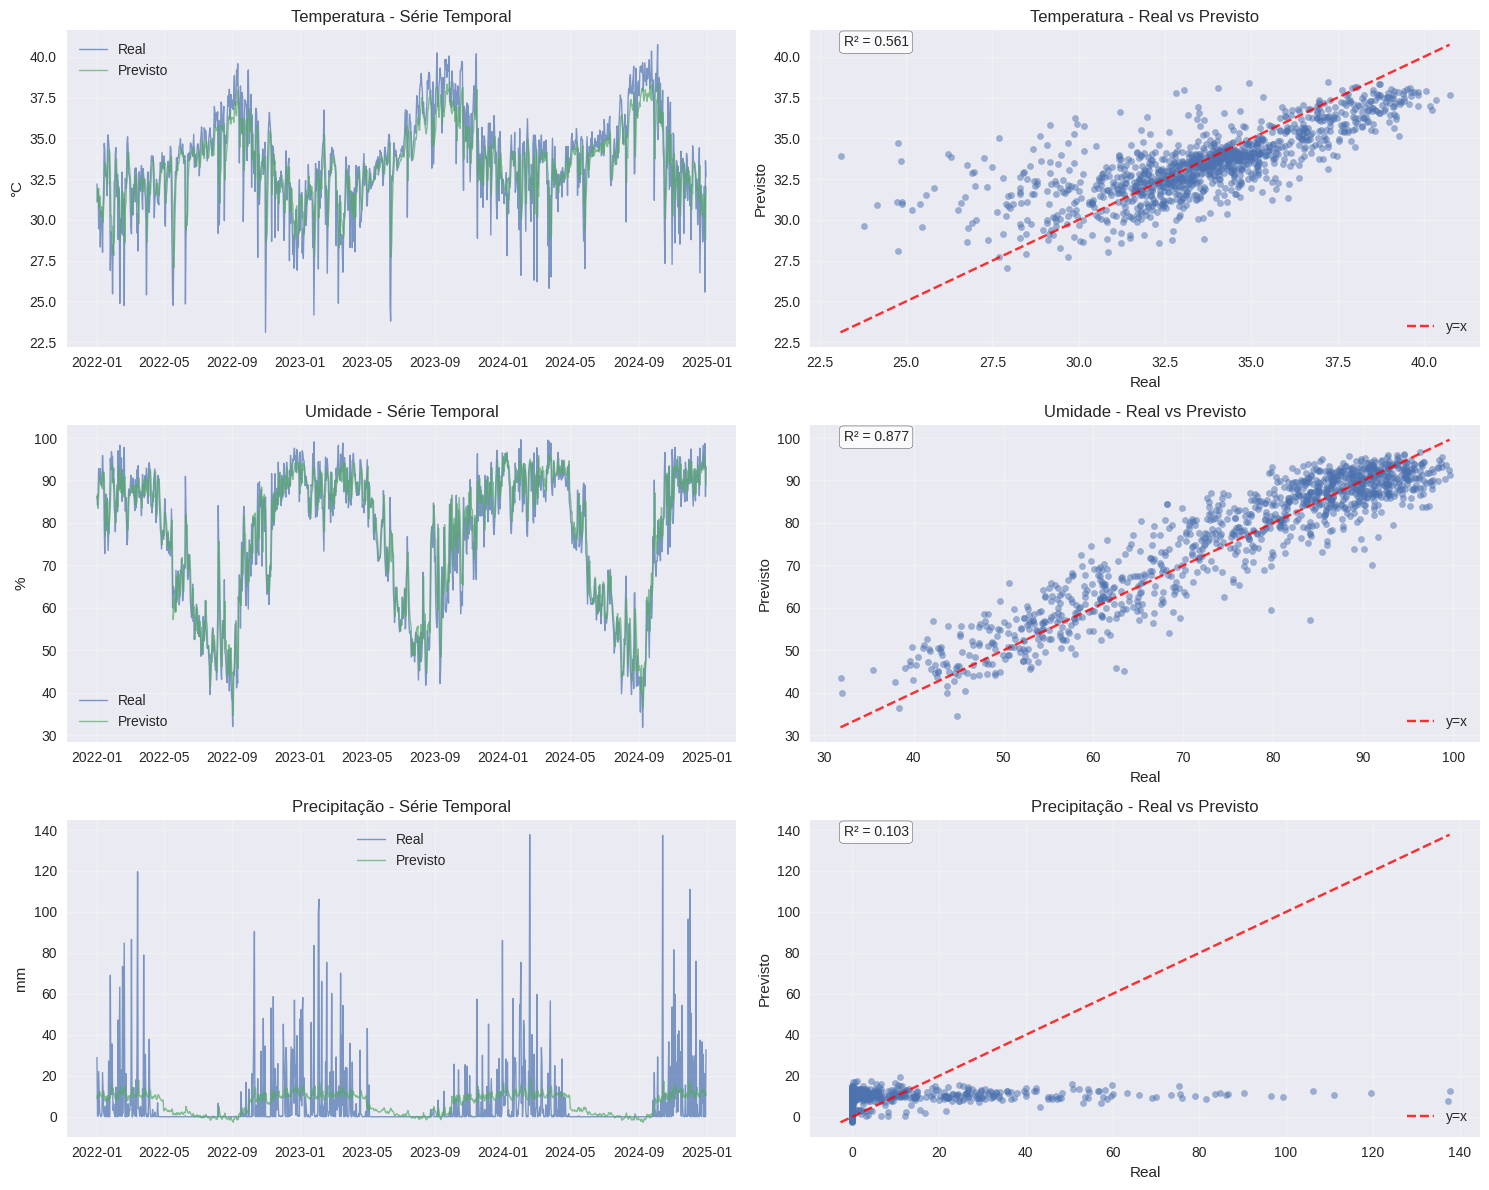

In [72]:
print("\n=== VISUALIZA√á√ÉO GR√ÅFICA ===")

import matplotlib.pyplot as plt

# Criar subplots para cada vari√°vel
fig, axes = plt.subplots(3, 2, figsize=(15, 12))


target_names = ['Temperatura', 'Umidade', 'Precipita√ß√£o']
units = ['¬∞C', '%', 'mm']

for i, target_name in enumerate(target_names):
    comp_df = comparison_dfs[target_name]

    # Gr√°fico 1: S√©rie temporal
    axes[i, 0].plot(comp_df['Data'], comp_df['Real'], label='Real', alpha=0.7, linewidth=1)
    axes[i, 0].plot(comp_df['Data'], comp_df['Previsto'], label='Previsto', alpha=0.7, linewidth=1)
    axes[i, 0].set_title(f'{target_name} - S√©rie Temporal')
    axes[i, 0].set_ylabel(units[i])
    axes[i, 0].legend()
    axes[i, 0].grid(True, alpha=0.3)

    # Gr√°fico 2: Dispers√£o Real vs Previsto
    axes[i, 1].scatter(comp_df['Real'], comp_df['Previsto'], alpha=0.5, s=20)

    # Linha de perfeita previs√£o (y=x)
    min_val = min(comp_df['Real'].min(), comp_df['Previsto'].min())
    max_val = max(comp_df['Real'].max(), comp_df['Previsto'].max())
    axes[i, 1].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, label='y=x')

    axes[i, 1].set_title(f'{target_name} - Real vs Previsto')
    axes[i, 1].set_xlabel('Real')
    axes[i, 1].set_ylabel('Previsto')
    axes[i, 1].legend()
    axes[i, 1].grid(True, alpha=0.3)

    # Adicionar R¬≤ no gr√°fico de dispers√£o
    r2 = r2_score(comp_df['Real'], comp_df['Previsto'])
    axes[i, 1].text(0.05, 0.95, f'R¬≤ = {r2:.3f}', transform=axes[i, 1].transAxes,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

In [73]:
print("\n=== AN√ÅLISE DETALHADA DOS ERROS ===")

for target_name, comp_df in comparison_dfs.items():
    print(f"\nüîç {target_name} - Distribui√ß√£o dos Erros:")

    # Estat√≠sticas de erro
    error_stats = comp_df['Erro'].describe()
    print(f"   Estat√≠sticas do Erro:")
    print(f"      M√©dia (vi√©s): {error_stats['mean']:.4f}")
    print(f"      Std: {error_stats['std']:.4f}")
    print(f"      Min: {error_stats['min']:.4f}")
    print(f"      Max: {error_stats['max']:.4f}")

    # Propor√ß√£o de erros dentro de intervalos
    if target_name == 'Temperatura':
        intervals = [0.5, 1.0, 2.0, 5.0]
    elif target_name == 'Umidade':
        intervals = [2.0, 5.0, 10.0, 20.0]
    else:  # Precipita√ß√£o
        intervals = [5.0, 10.0, 20.0, 50.0]

    print(f"   Propor√ß√£o de erros absolutos:")
    for interval in intervals:
        prop = (comp_df['Erro_Absoluto'] <= interval).mean() * 100
        print(f"      ‚â§ {interval}: {prop:.1f}%")


=== AN√ÅLISE DETALHADA DOS ERROS ===

üîç Temperatura - Distribui√ß√£o dos Erros:
   Estat√≠sticas do Erro:
      M√©dia (vi√©s): 0.1519
      Std: 1.9561
      Min: -10.8139
      Max: 4.8249
   Propor√ß√£o de erros absolutos:
      ‚â§ 0.5: 26.5%
      ‚â§ 1.0: 47.5%
      ‚â§ 2.0: 75.7%
      ‚â§ 5.0: 97.2%

üîç Umidade - Distribui√ß√£o dos Erros:
   Estat√≠sticas do Erro:
      M√©dia (vi√©s): -0.7519
      Std: 5.4985
      Min: -16.3434
      Max: 26.9442
   Propor√ß√£o de erros absolutos:
      ‚â§ 2.0: 28.6%
      ‚â§ 5.0: 65.1%
      ‚â§ 10.0: 93.5%
      ‚â§ 20.0: 99.7%

üîç Precipita√ß√£o - Distribui√ß√£o dos Erros:
   Estat√≠sticas do Erro:
      M√©dia (vi√©s): -0.0397
      Std: 15.6520
      Min: -16.9174
      Max: 129.7355
   Propor√ß√£o de erros absolutos:
      ‚â§ 5.0: 47.3%
      ‚â§ 10.0: 70.8%
      ‚â§ 20.0: 92.9%
      ‚â§ 50.0: 97.8%
